In [1]:
%run preprocess.py


Reading and Labelling: 100%|█████████████████████████████████████████████████████████| 234/234 [03:59<00:00,  1.02s/it]

Preprocessing data finished! 



In [1]:
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path 
import torch

## Summarize Stress normal : abnormal

In [74]:
stress_metadata_dir='metadata/stress'
stress_processed_dir='processed data/stress'

In [75]:
stress_metadata_dir=Path(stress_metadata_dir)
stress_processed_dir=Path(stress_processed_dir)
stress_traincsv_dir=stress_metadata_dir/"train_set.csv"
stress_train_meta=pd.read_csv(stress_traincsv_dir)
stress_meta_csvdir=stress_metadata_dir/'stress_metadata.csv'
stress_metadata=pd.read_csv(stress_meta_csvdir)

In [76]:
patient_pat=stress_metadata.loc[0]["filepath"].split('\\')[-1]
print(patient_pat)

stress N185459262.pt


In [77]:

stress_total_normal=[]
stress_total_abnormal=[]
for i in range(len(stress_metadata["filepath"])):
    patient_pat=stress_metadata.loc[i]["filepath"].split('\\')
    patient=patient_pat[-1]
    patient='processed data\\'+"stress\\"+ patient

    data=torch.load(patient)

    if data["label"]==1:
        stress_total_abnormal.append(patient)
    else:
        stress_total_normal.append(patient)

In [78]:
print(len(stress_total_normal))
print(len(stress_total_abnormal))

164
70


### augmentation on stress

In [54]:
%run stress_augmentation.py

In [79]:
stress_train_meta=pd.read_csv(stress_traincsv_dir)

stress_train_normal=[]
stress_train_abnormal=[]

for i in range(len(stress_train_meta["filepath"])):
    patient_pat=stress_train_meta.loc[i]["filepath"].split('\\')
    patient=patient_pat[-1]
    data=torch.load('processed data\\'+"stress\\"+patient)

    if data["label"]==1:
        stress_train_abnormal.append(patient)
    else:
        stress_train_normal.append(patient)

print(len(stress_train_normal))
print(len(stress_train_abnormal))

99
123


## Summarize Rest Normal: Abnormal

In [10]:
rest_metadata_dir='metadata/rest'
rest_processed_dir='processed data/rest'

In [11]:
rest_metadata_dir=Path(rest_metadata_dir)
rest_processed_dir=Path(rest_processed_dir)
rest_traincsv_dir=rest_metadata_dir/"train_set.csv"
rest_train_meta=pd.read_csv(rest_traincsv_dir)
rest_meta_csvdir=rest_metadata_dir/'rest_metadata.csv'
rest_metadata=pd.read_csv(rest_meta_csvdir)

In [12]:
patient_pat=rest_metadata.loc[0]["filepath"].split('\\')[-1]
print(patient_pat)

rest N185459262.pt


In [13]:
rest_total_normal=[]
rest_total_abnormal=[]
for i in range(len(rest_metadata["filepath"])):
    patient_pat=rest_metadata.loc[i]["filepath"].split('\\')
    patient=patient_pat[-1]
    patient='processed data\\'+"rest\\"+ patient

    data=torch.load(patient)

    if data["label"]==1:
        rest_total_abnormal.append(patient)
    else:
        rest_total_normal.append(patient)

In [14]:
print(len(rest_total_normal))
print(len(rest_total_abnormal))

175
59


### agumentation on rest

In [36]:
%run rest_augmentation.py

In [37]:
rest_train_meta=pd.read_csv(rest_traincsv_dir)

rest_train_normal=[]
rest_train_abnormal=[]

for i in range(len(rest_train_meta["filepath"])):
    patient_pat=rest_train_meta.loc[i]["filepath"].split('\\')
    patient=patient_pat[-1]
    data=torch.load('processed data\\'+"rest\\"+patient)

    if data["label"]==1:
        rest_train_abnormal.append(patient)
    else:
        rest_train_normal.append(patient)

print(len(rest_train_normal))
print(len(rest_train_abnormal))

106
102


### Model training

In [105]:
%run stress_Res18.py

 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.64it/s]

Saved checkpoint: model.ckpt-100

training global_step:100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:15, global loss:4.902E-03



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  3.23it/s]

Saved checkpoint: model.ckpt-200

training global_step:200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:29, global loss:4.604E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]


Saved checkpoint: model.ckpt-300

training global_step:300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:43, global loss:3.653E-03



 29%|████████████████████████                                                            | 2/7 [00:01<00:02,  2.25it/s]

Saved checkpoint: model.ckpt-400

training global_step:400

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:58, global loss:1.627E-03



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.94it/s]

Saved checkpoint: model.ckpt-500

training global_step:500

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:72, global loss:1.198E-03



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  2.99it/s]

Saved checkpoint: model.ckpt-600

training global_step:600

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:86, global loss:1.755E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]


Saved checkpoint: model.ckpt-700

training global_step:700

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:100, global loss:1.319E-03



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.53it/s]

Saved checkpoint: model.ckpt-800

training global_step:800

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:115, global loss:5.127E-04



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  3.27it/s]

Saved checkpoint: model.ckpt-900

training global_step:900

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:129, global loss:1.215E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]


Saved checkpoint: model.ckpt-1000

training global_step:1000

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:143, global loss:5.272E-04



 29%|████████████████████████                                                            | 2/7 [00:01<00:02,  2.24it/s]

Saved checkpoint: model.ckpt-1100

training global_step:1100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:158, global loss:9.151E-04



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.97it/s]

Saved checkpoint: model.ckpt-1200

training global_step:1200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:172, global loss:1.086E-03



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  3.33it/s]

Saved checkpoint: model.ckpt-1300

training global_step:1300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:186, global loss:4.690E-04



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]


Saved checkpoint: model.ckpt-1400

training global_step:1400

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:200, global loss:3.477E-04



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.52it/s]

Saved checkpoint: model.ckpt-1500

training global_step:1500

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:215, global loss:1.443E-04



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  3.00it/s]

Saved checkpoint: model.ckpt-1600

training global_step:1600

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:229, global loss:3.260E-04



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

Saved checkpoint: model.ckpt-1700

training global_step:1700

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:243, global loss:3.578E-04




 29%|████████████████████████                                                            | 2/7 [00:01<00:02,  2.26it/s]

Saved checkpoint: model.ckpt-1800

training global_step:1800

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:258, global loss:1.789E-04



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.87it/s]

Saved checkpoint: model.ckpt-1900

training global_step:1900

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:272, global loss:1.561E-04



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  3.09it/s]

Saved checkpoint: model.ckpt-2000

training global_step:2000

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:286, global loss:3.282E-04



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]


Saved checkpoint: model.ckpt-2100

training global_step:2100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:300, global loss:2.690E-04



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.69it/s]

Saved checkpoint: model.ckpt-2200

training global_step:2200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:315, global loss:3.368E-04



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  2.97it/s]

Saved checkpoint: model.ckpt-2300

training global_step:2300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:329, global loss:2.069E-04



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]


Saved checkpoint: model.ckpt-2400

training global_step:2400

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:343, global loss:7.639E-05



 29%|████████████████████████                                                            | 2/7 [00:00<00:02,  2.38it/s]

Saved checkpoint: model.ckpt-2500

training global_step:2500

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:358, global loss:1.619E-04



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:00,  3.03it/s]

Saved checkpoint: model.ckpt-2600

training global_step:2600

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:372, global loss:8.570E-05



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

Saved checkpoint: model.ckpt-2700

training global_step:2700

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:386, global loss:2.733E-04



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]


Saved checkpoint: model.ckpt-2800

training global_step:2800

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:400, global loss:1.061E-04



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.66it/s]

Saved checkpoint: model.ckpt-2900

training global_step:2900

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:415, global loss:7.918E-05



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  4.07it/s]

Saved checkpoint: model.ckpt-3000

training global_step:3000

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:429, global loss:6.358E-05



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]


Saved checkpoint: model.ckpt-3100

training global_step:3100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:443, global loss:1.070E-04



 29%|████████████████████████                                                            | 2/7 [00:00<00:02,  2.32it/s]

Saved checkpoint: model.ckpt-3200

training global_step:3200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:458, global loss:1.511E-04



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.90it/s]

Saved checkpoint: model.ckpt-3300

training global_step:3300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:472, global loss:5.120E-05



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

Saved checkpoint: model.ckpt-3400

training global_step:3400

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:486, global loss:4.444E-05



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]


Saved checkpoint: model.ckpt-3500

training global_step:3500

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:500, global loss:6.799E-05



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.45it/s]

Saved checkpoint: model.ckpt-3600

training global_step:3600

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:515, global loss:3.327E-05



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  2.57it/s]

Saved checkpoint: model.ckpt-3700

training global_step:3700

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:529, global loss:6.126E-05



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]

Saved checkpoint: model.ckpt-3800

training global_step:3800

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:543, global loss:4.259E-05




 14%|████████████                                                                        | 1/7 [00:01<00:07,  1.24s/it]

Saved checkpoint: model.ckpt-3900

training global_step:3900

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:558, global loss:3.646E-05



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.11it/s]

Saved checkpoint: model.ckpt-4000

training global_step:4000

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[ 99,   0],
       [  0, 123]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       123

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

training epoch:572, global loss:5.997E-05



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


In [38]:
%run rest_Res18.py

 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.70it/s]

Saved checkpoint: model.ckpt-100

training global_step:100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:15, global loss:5.856E-03



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  3.26it/s]

Saved checkpoint: model.ckpt-200

training global_step:200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:29, global loss:6.291E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]


Saved checkpoint: model.ckpt-300

training global_step:300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:43, global loss:4.863E-03



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  3.67it/s]

Saved checkpoint: model.ckpt-400

training global_step:400

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:58, global loss:2.007E-03



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.95it/s]

Saved checkpoint: model.ckpt-500

training global_step:500

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:72, global loss:2.381E-03



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  3.37it/s]

Saved checkpoint: model.ckpt-600

training global_step:600

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:86, global loss:3.016E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]


Saved checkpoint: model.ckpt-700

training global_step:700

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:100, global loss:4.491E-03



 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.89it/s]

Saved checkpoint: model.ckpt-800

training global_step:800

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:115, global loss:1.994E-03



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  4.17it/s]

Saved checkpoint: model.ckpt-900

training global_step:900

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:129, global loss:2.141E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]


Saved checkpoint: model.ckpt-1000

training global_step:1000

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:143, global loss:8.688E-04



 29%|████████████████████████                                                            | 2/7 [00:00<00:02,  2.34it/s]

Saved checkpoint: model.ckpt-1100

training global_step:1100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:158, global loss:8.958E-04



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  4.15it/s]

Saved checkpoint: model.ckpt-1200

training global_step:1200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:172, global loss:9.081E-04



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  3.00it/s]

Saved checkpoint: model.ckpt-1300

training global_step:1300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:186, global loss:7.792E-04



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

Saved checkpoint: model.ckpt-1400

training global_step:1400

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:200, global loss:1.814E-03




 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.32it/s]

Saved checkpoint: model.ckpt-1500

training global_step:1500

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:215, global loss:4.674E-04



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  2.72it/s]

Saved checkpoint: model.ckpt-1600

training global_step:1600

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:229, global loss:1.034E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]

Saved checkpoint: model.ckpt-1700

training global_step:1700

{'average_acc': 0.8317307692307693, 'average_precision': 1.0, 'Sensitivity': 0.6568627450980392, 'auc': 0.8284313725490196, 'confusion_matrix': array([[106,   0],
       [ 35,  67]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       106
           1       1.00      0.66      0.79       102

    accuracy                           0.83       208
   macro avg       0.88      0.83      0.83       208
weighted avg       0.87      0.83      0.83       208

training epoch:243, global loss:5.483E-02




 29%|████████████████████████                                                            | 2/7 [00:01<00:02,  2.07it/s]

Saved checkpoint: model.ckpt-1800

training global_step:1800

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:258, global loss:2.798E-03



 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:01,  2.16it/s]

Saved checkpoint: model.ckpt-1900

training global_step:1900

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:272, global loss:3.586E-03



 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  2.44it/s]

Saved checkpoint: model.ckpt-2000

training global_step:2000

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:286, global loss:3.086E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]

Saved checkpoint: model.ckpt-2100

training global_step:2100

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:300, global loss:4.191E-03




 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.16it/s]

Saved checkpoint: model.ckpt-2200

training global_step:2200

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:315, global loss:1.751E-03



 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  2.60it/s]

Saved checkpoint: model.ckpt-2300

training global_step:2300

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

training epoch:329, global loss:1.815E-03



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.83it/s]


Saved checkpoint: model.ckpt-2331

training global_step:2331

{'average_acc': 1.0, 'average_precision': 1.0, 'Sensitivity': 1.0, 'auc': 1.0, 'confusion_matrix': array([[106,   0],
       [  0, 102]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       102

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

Early stopping, validation loss cannot decrease anymore, choose current state_dict or previous savepoint to do final test
training epoch:333, global loss:1.270E-03

training epoch:333, val loss:1.911E-05

training global_step:2331



In [16]:
import tensorboard

%load_ext tensorboard
%tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 20676), started 2:14:47 ago. (Use '!kill 20676' to kill it.)

In [39]:
%reload_ext tensorboard
%tensorboard --logdir=runs --host localhost

Reusing TensorBoard on port 6006 (pid 25764), started 2:01:33 ago. (Use '!kill 25764' to kill it.)

In [ ]:
!taskkill /im tensorboard.exe /f
del /q %TMP%\.tensorboard-info\*

{'checkpoint_dir': 'checkpoints/checkpoints_stress_Res18', 'checkpoint_name': 'model.ckpt-900.pt', 'dataset_dir': '../../../metadata/stress', 'type': 'Res18'}
..\..\..\metadata\stress\test_set.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.79it/s]


MPI test:
{'average_acc': 0.8297872340425532, 'average_precision': 1.0, 'Sensitivity': 0.42857142857142855, 'auc': 0.7142857142857143, 'confusion_matrix': array([[33,  0],
       [ 8,  6]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        33
           1       1.00      0.43      0.60        14

    accuracy                           0.83        47
   macro avg       0.90      0.71      0.75        47
weighted avg       0.86      0.83      0.80        47

{'checkpoint_dir': 'checkpoints/checkpoints_rest_Res18', 'checkpoint_name': 'model.ckpt-100.pt', 'dataset_dir': '../../../metadata/rest', 'type': 'Res18'}
..\..\..\metadata\rest\test_set.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.27it/s]


MPI test:
{'average_acc': 0.8297872340425532, 'average_precision': 1.0, 'Sensitivity': 0.42857142857142855, 'auc': 0.7142857142857143, 'confusion_matrix': array([[33,  0],
       [ 8,  6]], dtype=int64), 'specificity': 1.0}
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        33
           1       1.00      0.43      0.60        14

    accuracy                           0.83        47
   macro avg       0.90      0.71      0.75        47
weighted avg       0.86      0.83      0.80        47



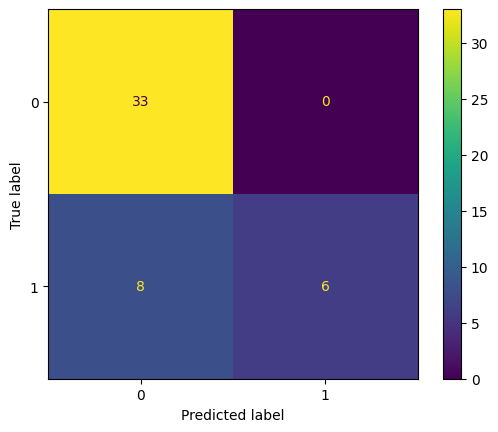

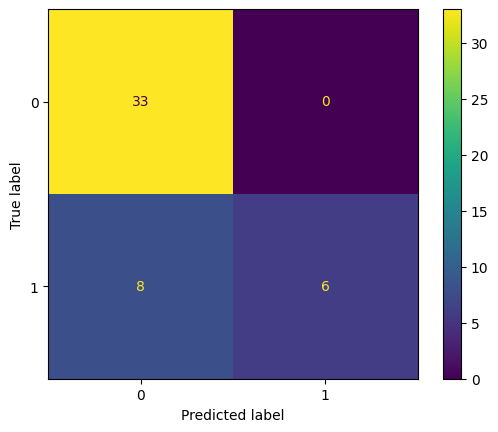

In [36]:
%run test_single.py

# Class Activation Map

In [1]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import BinaryClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from utils import MPIDataset,save_checkpoint, load_checkpoint,Evaluator
from models.Classifiers import Res18
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import skimage.transform
import os

In [2]:
from cam import *
import os

### model preparation

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
## For Stress 
model_stress = Res18()
stress_checkpoint_dir=Path(r"checkpoints/checkpoints_stress_Res18")/"model.ckpt-1600.pt"
stress_checkpoint=torch.load(stress_checkpoint_dir)
model_stress.load_state_dict(stress_checkpoint["model"])  
model_stress.to(device)
model_stress.eval()
stress_target_layers = [model_stress.model.layer4[-1]]




In [4]:
model_rest=Res18()
rest_checkpoint_dir=Path(r"checkpoints/checkpoints_rest_Res18")/"model.ckpt-100.pt"
rest_checkpoint=torch.load(rest_checkpoint_dir)
model_rest.load_state_dict(rest_checkpoint["model"])  
model_rest.to(device)
model_rest.eval()
rest_target_layers=[model_rest.model.layer4[-1]]

In [5]:

stress_input,rest_input,patient_pt=input_tensor()
# print(len(stress_input))
# print(len(rest_input))

stress_input=iter(stress_input)
rest_input=iter(rest_input)
patient_pt=iter(patient_pt)





In [6]:
stress_input_tensor=next(stress_input)
rest_input_tensor=next(rest_input)
patient=next(patient_pt).split('.')[0]
print(patient)

N152698773


In [96]:
%%capture
rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=0)
stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=0)

abnormal region of stress map is 34.9089% 
abnormal region of rest map  is 29.7095%  
region of ischemia is 8.0887%
region of scar is 23.5403%


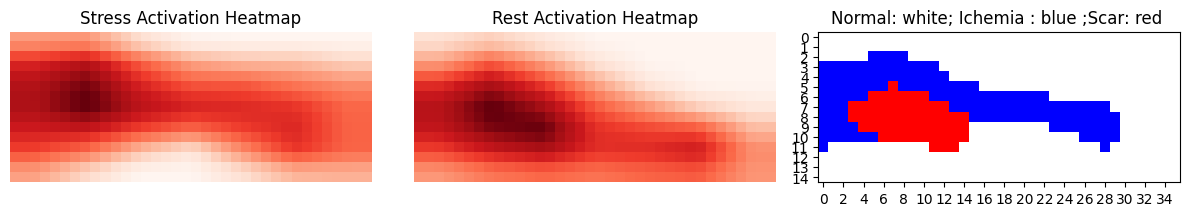

In [97]:
stress_percent,rest_percent,ischemia_percent,scar_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient)

## collect all the information and make them into a chart(pd.frame):

## Conventional 

In [5]:
pat_bin,pat_txt=sort_txt_bin("DUMP")
TID=[]
SRD_STRESS_DIST_normal=[]
SRD_REST_DIST_normal=[]
SRD_STRESS_DIST_abnormal=[]
SRD_REST_DIST_abnormal=[]
normal=[]
ischemia=[]
scar=[]
stress_input,rest_input,patient_pt=input_tensor()
for i in patient_pt:
    pat_name=i.split('.')[0]
    this_txt=findtxt(pat_name,pat_txt)
    txt_df=pd.read_csv(("DUMP//"+this_txt),sep=" :=",index_col=0,header=None)
    
    TID_INDEX=np.float32(txt_df.loc["TID_INDEX"])[0]
    stress_normal=np.float32(txt_df.loc["SRD_STRESS_DIST(03)"])[0]
    rest_normal=np.float32(txt_df.loc["SRD_REST_DIST(03)"])[0]
    
    normal_00=np.float32(txt_df.loc["SRD_ISCHEMIA_DIST(00)"])[0]
    ischemia_01=np.float32(txt_df.loc["SRD_ISCHEMIA_DIST(01)"])[0]
    scar_02=np.float32(txt_df.loc["SRD_ISCHEMIA_DIST(02)"])[0]
    
    TID.append(TID_INDEX)
    SRD_STRESS_DIST_normal.append(stress_normal)
    SRD_REST_DIST_normal.append(rest_normal)
    SRD_STRESS_DIST_abnormal.append(100-stress_normal)
    SRD_REST_DIST_abnormal.append(100-rest_normal)
    
    normal.append(normal_00)
    ischemia.append(ischemia_01)
    scar.append(scar_02)
    

In [6]:
convention=np.array([SRD_STRESS_DIST_abnormal,SRD_REST_DIST_abnormal,normal,ischemia,scar])
convention=convention.T
print(convention.shape)

(59, 5)


In [7]:
def seg(j):
    """i is method name"""
    stress_input,rest_input,patient_pt=input_tensor()
    abnormal_stress=[]
    abnormal_rest=[]
    normal=[]
    ischemia=[]
    scar=[]
    for i in range(len(patient_pt)):
        stress_input_tensor=stress_input[i]
        rest_input_tensor=rest_input[i]
        rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=j)
        stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=j)
        stress_percent,rest_percent,ischemia_percent,scar_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient_pt[i].split('.')[0])
        abnormal_stress.append(stress_percent*100)
        abnormal_rest.append(scar_percent*100)
        normal.append((1-ischemia_percent-scar_percent)*100)
        ischemia.append(ischemia_percent*100)
        scar.append(scar_percent*100)
    gradcam=np.array([abnormal_stress,abnormal_rest,normal,ischemia,scar])
    gradcam=gradcam.T
    
    return gradcam

    

In [36]:
def correlate_plot(mh,cam,title_name,cam_name):
    """
    mh: single colume of abnormal stress or abnormal rest, normal, ischemia,scar
    cam: single colume of that
    title_name: abnormal_stress,abnormal_rest,normal,ischemia,scar
    cam_name: Class activation name
    """
    x=np.linspace(0,100,10)
    y=np.linspace(0,100,10)
    y_plus10=np.linspace(10,110,10)
    y_minus10=np.linspace(-10,90,10)
    y_plus15=np.linspace(15,115,10)
    y_minus15=np.linspace(-15,85,10)
    plt.figure(figsize =(6, 6))
    plt.scatter(mh,cam,c="red",edgecolor='yellow')
    plt.plot(x,y,color='blue',label='y=x')
    plt.plot(x,y_plus10,color='green',label='y=x+10',linestyle=':')
    plt.plot(x,y_minus10,color='green',label='y=x-10',linestyle=':')
    plt.plot(x,y_plus15,color='black',label='y=x+15',linestyle=':')
    plt.plot(x,y_minus15,color='black',label='y=x-15',linestyle=':')
    plt.title("{}".format(title_name))
    plt.xlabel("Conventional TPD")
    plt.ylabel("{}".format(cam_name))
    plt.xlim((0,100))
    plt.ylim((0,100))
    
    plt.legend()
    plt.savefig("plot/{}+{}.png".format(cam_name,title_name))
    
    plt.show()
    

In [37]:

title_name=["Abnormal region extent in stress polarmap","Abnormal region extent in rest polarmap",
            " Normal Region extent","Ischemia region extent","Scar region extent"]
cam_name=["GradCAM","GradCAMPlusPlus","AblationCAM","HiResCAM"]

In [38]:
%%capture
gradcam0=seg(0)
for j in range(len(cam_name)):
    gradcam=seg(j)
    for i in range(len(title_name)):
        correlate_plot(convention[:,i],gradcam[:,i],title_name[i],cam_name[j])

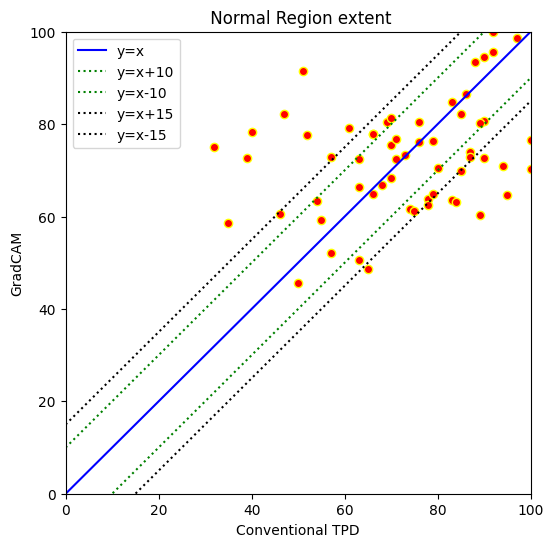

In [35]:
correlate_plot(convention[:,2],gradcam0[:,2],title_name[2],cam_name[0])

tensor([[[[0.2293, 2.7910, 1.7442,  ..., 2.4538, 1.9065, 2.6774],
          [0.9452, 0.1063, 0.0000,  ..., 0.0000, 2.3140, 1.4837],
          [0.1069, 0.0000, 0.5536,  ..., 0.0000, 0.0000, 1.2051],
          ...,
          [0.0000, 0.0000, 0.4778,  ..., 0.0000, 0.0000, 0.0000],
          [0.0048, 0.0000, 1.1887,  ..., 0.0000, 0.0000, 0.0000],
          [0.3627, 0.0000, 1.4816,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.4989, 0.8136, 0.0000,  ..., 0.0000, 0.0620, 0.3670],
          [0.4663, 0.0000, 0.4271,  ..., 0.0000, 0.0000, 1.6201],
          [0.0000, 0.0000, 0.0000,  ..., 0.8246, 0.0000, 1.1128],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6065, 0.0000],
          [0.0000, 1.0052, 1.3560,  ..., 0.2062, 0.0000, 0.0000],
          [0.0606, 0.7620, 0.5940,  ..., 0.3269, 0.7338, 0.0000]],

         [[0.2583, 0.1501, 0.6283,  ..., 0.0509, 0.0681, 0.1918],
          [0.0000, 1.8659, 1.2234,  ..., 0.0570, 2.1173, 0.9122],
          [0.2016, 1.0883, 2.5792,  ..., 1

tensor([[[[0.2770, 2.1949, 1.0194,  ..., 1.6827, 0.9508, 1.5841],
          [0.0000, 0.0000, 0.4776,  ..., 0.0000, 1.4078, 3.1113],
          [0.0000, 0.0484, 0.7107,  ..., 0.0000, 0.1136, 1.8034],
          ...,
          [0.3853, 0.0000, 0.8069,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7280]],

         [[0.0000, 0.0000, 0.0887,  ..., 0.0679, 0.4907, 0.5410],
          [0.0000, 0.0000, 0.9994,  ..., 0.9962, 2.1027, 0.9749],
          [0.0000, 0.2194, 0.0000,  ..., 1.9117, 1.4030, 1.2150],
          ...,
          [0.0000, 0.0000, 0.3631,  ..., 0.0000, 0.8280, 0.0000],
          [0.8522, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.7958, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.1200,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.6891, 1.1281,  ..., 0.0000, 0.0000, 1.0668],
          [0.8587, 0.2418, 3.5187,  ..., 0

tensor([[[[0.0000e+00, 9.3352e-01, 3.1734e+00,  ..., 2.3817e+00,
           2.7676e+00, 2.0707e+00],
          [0.0000e+00, 2.2457e-03, 7.1432e-01,  ..., 1.3990e+00,
           8.1833e-01, 2.7495e+00],
          [0.0000e+00, 4.6194e-01, 1.1582e+00,  ..., 2.7094e+00,
           2.0322e+00, 4.0138e+00],
          ...,
          [0.0000e+00, 1.8516e-01, 1.1343e+00,  ..., 1.8225e+00,
           2.1095e+00, 1.7918e+00],
          [0.0000e+00, 8.8423e-02, 1.1603e+00,  ..., 1.9387e+00,
           1.2425e+00, 7.9659e-01],
          [0.0000e+00, 3.4636e-01, 4.4796e-01,  ..., 6.6676e-01,
           1.4156e-01, 0.0000e+00]],

         [[1.6895e-01, 1.8720e+00, 7.2696e-01,  ..., 6.5121e-01,
           1.6757e+00, 2.8967e-01],
          [0.0000e+00, 2.2726e-01, 4.8107e-01,  ..., 7.4892e-01,
           1.9688e+00, 2.2441e+00],
          [0.0000e+00, 1.0566e+00, 8.2497e-01,  ..., 1.4173e+00,
           1.3837e+00, 1.6466e+00],
          ...,
          [0.0000e+00, 2.6003e+00, 1.6695e+00,  ..., 7.8883

tensor([[[[0.0000, 0.4204, 1.4886,  ..., 2.1023, 2.0541, 1.3332],
          [0.0000, 0.0000, 1.0892,  ..., 0.6814, 0.8698, 2.3166],
          [0.0000, 0.0000, 2.6767,  ..., 1.8868, 1.0385, 4.3511],
          ...,
          [0.0000, 0.5149, 0.7287,  ..., 1.2645, 1.6137, 1.1135],
          [0.0000, 0.0000, 0.6457,  ..., 1.2663, 0.3996, 1.1553],
          [0.0000, 0.0000, 1.4820,  ..., 0.4200, 0.0000, 0.0000]],

         [[0.1820, 0.7446, 0.7200,  ..., 1.2013, 1.8114, 0.0000],
          [0.0000, 0.6875, 1.2468,  ..., 1.9830, 4.1167, 2.1883],
          [0.0000, 0.5008, 5.7806,  ..., 4.9830, 4.4353, 2.5356],
          ...,
          [0.0000, 0.0000, 1.2338,  ..., 0.7683, 1.0288, 0.5312],
          [0.0000, 0.0000, 0.5021,  ..., 0.9755, 1.6995, 1.1828],
          [0.0000, 0.0345, 0.0000,  ..., 0.0876, 0.1362, 0.0000]],

         [[0.0000, 0.0000, 0.5301,  ..., 0.4692, 0.7166, 1.2460],
          [0.5674, 0.3290, 0.1998,  ..., 0.2254, 1.9827, 0.0000],
          [0.0000, 0.8064, 0.0000,  ..., 0

abnormal region of stress map is 35.3472% 
abnormal region of rest map  is 25.0292%  
region of ischemia is 4.0676%
region of scar is 19.6736%
tensor([[[[1.0442e-01, 2.0767e+00, 1.3832e+00,  ..., 1.7227e+00,
           1.7059e+00, 1.3792e+00],
          [0.0000e+00, 0.0000e+00, 8.9489e-02,  ..., 0.0000e+00,
           1.3243e+00, 2.6586e+00],
          [2.5177e-01, 0.0000e+00, 2.6314e+00,  ..., 2.3475e+00,
           1.1735e+00, 8.0534e-01],
          ...,
          [0.0000e+00, 0.0000e+00, 5.1025e-01,  ..., 0.0000e+00,
           3.5863e-01, 0.0000e+00],
          [5.0217e-01, 0.0000e+00, 0.0000e+00,  ..., 4.6687e-01,
           7.7057e-01, 7.7620e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 3.0378e-01]],

         [[3.3438e-03, 3.1184e-01, 4.1718e-02,  ..., 0.0000e+00,
           5.1697e-01, 2.9201e-01],
          [5.2322e-01, 7.7007e-01, 0.0000e+00,  ..., 7.7999e-01,
           1.2240e+00, 7.2080e-01],
          [0.0000e+00, 0.0000e+0

tensor([[[[7.4229e-02, 1.9211e+00, 1.4767e-01,  ..., 2.3846e+00,
           2.7698e+00, 1.4144e+00],
          [0.0000e+00, 0.0000e+00, 8.0919e-01,  ..., 1.5609e+00,
           9.5858e-01, 1.3510e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.8501e-01,
           0.0000e+00, 1.1218e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.4731e-01,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 4.9607e-01]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           2.0157e-01, 2.7281e-01],
          [0.0000e+00, 3.8132e-01, 0.0000e+00,  ..., 2.6595e-01,
           1.9374e+00, 5.6290e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.2960e+00,
           3.5853e+00, 2.4011e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.4230

tensor([[[[0.0000, 0.8312, 1.2847,  ..., 0.2060, 1.2356, 1.2442],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4875, 0.1483],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.7170],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2063, 0.0321],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0225, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.3096],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.8449, 1.0491, 1.2102,  ..., 2.1784, 0.7101, 1.3378],
          [3.3808, 2.4017, 3.0742,  ..., 2.7274, 1.2519, 1.3119],
          [1.9243, 2.2978, 2.5481,  ..., 2

tensor([[[[0.0000, 3.1378, 3.3704,  ..., 4.3983, 3.7725, 4.0087],
          [0.0000, 0.1794, 1.0420,  ..., 1.7425, 1.5309, 3.3399],
          [0.0000, 0.5790, 1.4820,  ..., 1.2739, 3.4613, 3.6692],
          ...,
          [0.0000, 0.7061, 2.3910,  ..., 1.1918, 0.6363, 0.8914],
          [0.0000, 0.7870, 1.8972,  ..., 0.5760, 0.0000, 0.0000],
          [0.0000, 0.6463, 1.8980,  ..., 0.2949, 0.0000, 0.0000]],

         [[0.6145, 2.2277, 2.3019,  ..., 1.7497, 1.2033, 0.9044],
          [0.0000, 1.0435, 1.2357,  ..., 0.9334, 1.0209, 0.7135],
          [0.0000, 1.3493, 1.7024,  ..., 0.7024, 2.1352, 1.4525],
          ...,
          [0.0000, 1.6182, 2.0293,  ..., 1.1766, 1.8177, 1.2132],
          [0.0000, 2.0114, 3.8332,  ..., 0.8860, 1.2394, 1.4651],
          [0.0000, 0.1840, 1.4406,  ..., 0.0050, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1085, 0.0000, 0.4049,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 3.4438e-01, 0.0000e+00,  ..., 1.8039e+00,
           2.9651e-01, 5.2454e-02],
          [1.5365e-02, 0.0000e+00, 1.6030e+00,  ..., 0.0000e+00,
           4.4376e-01, 2.4524e-01],
          [3.9942e-01, 2.2067e-01, 2.9635e+00,  ..., 1.3420e+00,
           4.4816e-01, 7.6112e-01]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.3858e-01, 0.0000e+00, 0.0000e+00,  ..., 4.9179e-01,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 1.7600e+00,  ..., 2.9387

tensor([[[[0.2508, 0.5283, 0.0000,  ..., 1.1254, 1.1086, 1.9319],
          [0.0000, 0.0000, 1.1629,  ..., 1.5715, 0.0000, 1.7784],
          [0.0000, 0.0000, 0.0000,  ..., 0.9580, 0.0000, 0.9745],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5749, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7596,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4188, 0.5061],
          [0.0000, 0.0000, 0.2476,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.1522,  ..., 0.1766, 0.0856, 0.9427],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 2.5488, 0.0000, 0.1781],
          [0.0000, 0.0000, 0.0000,  ..., 1.8075, 0.0000, 0.4420],
          [0.0000, 0.0000, 0.3141,  ..., 0.0000, 0.0000, 0.0738]],

         [[1.4578, 1.4758, 1.7757,  ..., 1.8413, 0.8081, 0.5596],
          [1.2711, 1.4076, 1.7780,  ..., 1.2801, 2.2441, 0.0000],
          [1.2480, 0.2710, 4.3797,  ..., 0

tensor([[[[0.0000e+00, 2.7852e+00, 1.6108e+00,  ..., 2.9730e+00,
           2.0104e+00, 1.2147e+00],
          [0.0000e+00, 0.0000e+00, 1.8080e+00,  ..., 9.0371e-01,
           0.0000e+00, 3.4074e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.3664e-02,
           0.0000e+00, 7.6325e-01],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 5.9598e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           1.4911e-01, 5.6787e-01],
          [0.0000e+00, 0.0000e+00, 2.1409e+00,  ..., 1.5640e+00,
           8.6333e-01, 1.0515e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.6023e-01,
           0.0000e+00, 4.2555e-01],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000

abnormal region of stress map is 30.6256% 
abnormal region of rest map  is 25.7462%  
region of ischemia is 4.2488%
region of scar is 19.5637%
tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 6.5630e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 7.0038e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 8.0448e-01],
          ...,
          [1.8527e+00, 5.5302e-02, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 4.1126e-02],
          [3.5087e-01, 0.0000e+00, 1.4797e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.5014e+00, 0.0000e+00, 2.5058e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],

         [[8.7904e-02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+0

tensor([[[[2.4951e-01, 2.1500e+00, 1.1425e+00,  ..., 1.5356e+00,
           2.0126e+00, 1.0999e+00],
          [0.0000e+00, 0.0000e+00, 2.5974e-01,  ..., 2.2773e+00,
           2.2303e-03, 2.6282e+00],
          [0.0000e+00, 0.0000e+00, 3.6637e+00,  ..., 0.0000e+00,
           0.0000e+00, 1.6347e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 7.7168e-01,  ..., 0.0000e+00,
           4.8773e-01, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 7.3256e-01,  ..., 0.0000e+00,
           2.0973e-01, 0.0000e+00],
          [1.4470e+00, 0.0000e+00, 1.4638e+00,  ..., 0.0000e+00,
           3.6195e-01, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           4.6918e-01, 3.7150e-01],
          [0.0000e+00, 0.0000e+00, 1.5029e+00,  ..., 1.1362e+00,
           1.8175e+00, 7.4437e-01],
          [0.0000e+00, 0.0000e+00, 1.3501e-01,  ..., 2.8304e+00,
           2.3266e+00, 1.0927e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.5608

tensor([[[[0.0000e+00, 1.3730e+00, 1.6375e+00,  ..., 2.3983e+00,
           2.5144e+00, 3.7341e+00],
          [0.0000e+00, 1.7738e-01, 1.0641e+00,  ..., 0.0000e+00,
           0.0000e+00, 2.8155e+00],
          [0.0000e+00, 3.6589e-01, 1.2704e+00,  ..., 4.5961e-01,
           5.7705e-04, 2.7224e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 1.2522e+00,  ..., 1.1133e+00,
           3.8937e-01, 1.8404e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.0832e-01,
           6.3712e-01, 5.0666e-01],
          [0.0000e+00, 0.0000e+00, 8.6816e-01,  ..., 4.5707e-01,
           0.0000e+00, 5.8198e-01]],

         [[5.7184e-01, 8.2223e-01, 1.1820e+00,  ..., 3.8544e-01,
           1.5027e+00, 6.6769e-01],
          [0.0000e+00, 8.0040e-01, 1.8099e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 4.0710e-01, 2.9074e+00,  ..., 2.4620e-01,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 1.8960e-01, 0.0000e+00,  ..., 2.0752

abnormal region of stress map is 5.5170% 
abnormal region of rest map  is 17.4586%  
region of ischemia is 1.5433%
region of scar is 16.3686%
tensor([[[[3.0532e-01, 6.4240e-02, 0.0000e+00,  ..., 9.3684e-01,
           2.5080e+00, 1.4120e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.6880e-02,
           2.7956e-02, 2.0353e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 1.4456e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 5.4972e-01],
          [8.9416e-02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 5.6392e-01,  ..., 1.5188e+00,
           0.0000e+00, 4.3819e-01]],

         [[0.0000e+00, 0.0000e+00, 1.6157e-01,  ..., 0.0000e+00,
           1.8189e-01, 7.2726e-01],
          [1.0318e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           1.7543e+00, 1.2555e+00],
          [0.0000e+00, 0.0000e+00

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0316, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2992],
          [0.6995, 0.5688, 0.4345,  ..., 0.1307, 0.0000, 0.0000],
          [0.9565, 0.8009, 0.6177,  ..., 0.2728, 0.1911, 0.1468]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1281],
          ...,
          [0.0000, 0.2923, 1.8226,  ..., 0.0000, 0.0000, 0.0390],
          [0.0000, 2.1383, 1.2654,  ..., 0.0000, 0.4950, 1.2221],
          [0.0000, 0.9215, 1.5111,  ..., 0.0000, 0.0000, 1.2877]],

         [[1.6095, 1.9619, 0.8396,  ..., 0.7730, 0.8939, 0.0000],
          [1.2885, 3.5953, 2.4574,  ..., 4.2272, 2.3475, 0.8737],
          [0.6190, 2.6773, 2.8464,  ..., 3

tensor([[[[0.0000, 0.0000, 1.6655,  ..., 1.7012, 2.5353, 2.7633],
          [0.0000, 0.0000, 0.0000,  ..., 1.1509, 1.9521, 2.7719],
          [0.0000, 0.0000, 1.0395,  ..., 3.3736, 3.7424, 4.7251],
          ...,
          [0.0000, 0.0000, 0.9288,  ..., 1.1310, 1.4529, 2.5400],
          [0.0000, 0.0000, 1.5880,  ..., 0.3471, 0.0000, 1.6194],
          [0.0000, 0.0000, 1.9884,  ..., 0.1166, 0.0000, 0.0000]],

         [[0.0000, 0.1639, 0.6824,  ..., 1.7305, 2.3580, 0.3826],
          [0.0000, 0.0000, 0.0000,  ..., 1.9595, 2.4938, 2.4360],
          [0.0000, 0.0000, 0.4072,  ..., 3.0913, 5.6194, 3.9026],
          ...,
          [0.0000, 0.0000, 0.2666,  ..., 0.0000, 2.1250, 2.5512],
          [0.0000, 0.0752, 0.0000,  ..., 0.0000, 0.6132, 0.5685],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3565, 0.5669, 1.2561,  ..., 1.0339, 0.1085, 0.3654],
          [1.0644, 2.1927, 1.5838,  ..., 0.0000, 1.2304, 0.0000],
          [0.9679, 0.3658, 3.4724,  ..., 0

tensor([[[[0.0000e+00, 2.7647e-01, 0.0000e+00,  ..., 5.6403e-01,
           1.4288e+00, 1.1104e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 4.5000e-01,  ..., 0.0000e+00,
           0.0000e+00, 2.6492e-01],
          ...,
          [3.6959e-01, 4.1148e-01, 1.1075e+00,  ..., 2.1306e+00,
           8.1751e-01, 1.7152e+00],
          [1.1620e-01, 0.0000e+00, 2.3041e+00,  ..., 1.1504e+00,
           7.8885e-01, 1.1780e+00],
          [1.0416e+00, 0.0000e+00, 2.0946e+00,  ..., 2.1382e+00,
           1.8112e+00, 3.5257e-01]],

         [[1.5867e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 5.2890e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           2.1939e-01, 5.1627e-02],
          [0.0000e+00, 4.3274e-02, 0.0000e+00,  ..., 1.4701e+00,
           0.0000e+00, 2.3755e-01],
          ...,
          [0.0000e+00, 1.1094e+00, 1.3304e+00,  ..., 2.1762

tensor([[[[0.0000, 0.5206, 1.2601,  ..., 0.8043, 0.4373, 0.2098],
          [0.0000, 0.0000, 0.7202,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.9049,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.5614],
          [0.0000, 0.0000, 0.0000,  ..., 0.2478, 0.0000, 0.3054],
          [0.0000, 0.0000, 0.0000,  ..., 0.0103, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.8303,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.3659, 0.0000],
          [0.0000, 0.0000, 0.1140,  ..., 0.0000, 0.4122, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.0387, 0.9605, 0.4863,  ..., 1.3095, 0.8855, 0.6322],
          [2.3376, 1.6283, 1.3764,  ..., 3.2219, 2.4748, 2.7016],
          [1.4894, 1.4041, 1.6889,  ..., 2

tensor([[[[0.0000, 0.6190, 2.0840,  ..., 0.3623, 0.0000, 0.4781],
          [0.0000, 0.0000, 0.1550,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7044,  ..., 0.1339, 0.0000, 0.1415],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0510,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.2207, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7990,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 1.2955, 0.0000,  ..., 0.0000, 0.9699, 0.0000],
          [0.0000, 0.2950, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.4521, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0175, 0.6396, 0.1372,  ..., 0.9498, 1.0654, 0.5776],
          [1.4214, 1.9966, 2.8308,  ..., 3.7315, 1.3160, 2.0620],
          [0.5334, 1.1395, 1.2483,  ..., 2

tensor([[[[1.0873e-02, 3.3417e+00, 1.3635e+00,  ..., 3.1192e+00,
           1.4189e+00, 2.3252e+00],
          [0.0000e+00, 7.3522e-01, 8.6396e-02,  ..., 1.9878e+00,
           3.7914e-01, 1.5164e+00],
          [1.0549e+00, 0.0000e+00, 2.6443e+00,  ..., 2.1934e+00,
           1.0824e-02, 2.8777e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 1.5995e+00,  ..., 8.9352e-01,
           1.1936e+00, 0.0000e+00],
          [4.7823e-02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           5.3055e-01, 0.0000e+00],
          [0.0000e+00, 2.5642e-02, 1.4889e+00,  ..., 4.3872e-01,
           0.0000e+00, 1.4694e+00]],

         [[0.0000e+00, 1.8403e-01, 2.4840e-01,  ..., 1.6024e-01,
           6.7610e-01, 6.7928e-01],
          [0.0000e+00, 7.9244e-01, 1.7406e+00,  ..., 7.4285e-01,
           2.1923e+00, 1.0709e-01],
          [0.0000e+00, 0.0000e+00, 2.6745e-01,  ..., 3.7958e+00,
           2.4954e+00, 6.1311e-01],
          ...,
          [5.3118e-01, 0.0000e+00, 2.6732e+00,  ..., 4.9552

tensor([[[[0.0000, 1.4627, 1.8828,  ..., 2.0135, 1.8581, 2.5813],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.5545],
          [0.0000, 0.0000, 0.1605,  ..., 0.0000, 0.0000, 1.2293],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1602,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7084, 0.0000, 0.0000,  ..., 0.0000, 0.0125, 0.0000],
          [0.0000, 0.0000, 0.0470,  ..., 0.0000, 0.0000, 0.7289],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0029, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.5243, 0.0316, 0.2517,  ..., 0.0000, 0.0504, 0.2294],
          [1.4766, 0.8226, 3.5003,  ..., 1.4051, 2.1093, 1.3751],
          [0.6569, 1.7942, 1.6171,  ..., 1

abnormal region of stress map is 49.6174% 
abnormal region of rest map  is 48.7594%  
region of ischemia is 5.3733%
region of scar is 35.3972%
tensor([[[[0.0000, 0.1337, 0.0000,  ..., 0.0000, 0.1131, 0.0000],
          [0.0000, 0.0000, 0.0194,  ..., 0.8161, 0.6373, 0.9279],
          [0.0000, 0.6015, 0.1923,  ..., 1.7690, 0.3101, 0.5586],
          ...,
          [0.1769, 1.1918, 1.6747,  ..., 0.8304, 0.1407, 2.5928],
          [0.8623, 0.3641, 1.7934,  ..., 1.2208, 0.5322, 1.0838],
          [0.2520, 0.0000, 3.7950,  ..., 0.4696, 0.6398, 1.0883]],

         [[0.0000, 0.0000, 0.2526,  ..., 0.0000, 0.0000, 0.3846],
          [0.0000, 0.0000, 0.7784,  ..., 0.3576, 0.2290, 0.2880],
          [0.0000, 0.3841, 2.7279,  ..., 2.5975, 1.2648, 0.0000],
          ...,
          [0.0000, 0.0000, 2.8254,  ..., 4.3042, 0.5203, 0.0000],
          [0.0000, 0.6867, 3.1405,  ..., 3.7899, 0.9810, 0.3841],
          [0.0000, 0.3712, 1.9765,  ..., 0.0000, 0.2356, 0.5260]],

         [[0.9952, 3.4917, 1.70

abnormal region of stress map is 32.0033% 
abnormal region of rest map  is 19.9408%  
region of ischemia is 14.9996%
region of scar is 20.1137%
tensor([[[[0.0000, 2.6818, 2.1460,  ..., 1.3500, 1.2539, 1.8915],
          [0.0000, 1.4393, 2.2372,  ..., 2.1339, 1.1732, 3.9116],
          [1.3178, 1.9521, 3.5010,  ..., 3.0836, 1.0353, 1.5827],
          ...,
          [1.1839, 1.9472, 4.9815,  ..., 2.7642, 1.3925, 0.8090],
          [0.7580, 0.6535, 2.0131,  ..., 1.7793, 1.1220, 0.6970],
          [1.6613, 1.2207, 3.3506,  ..., 1.3354, 1.0973, 0.8773]],

         [[0.2886, 0.0000, 0.2769,  ..., 0.5197, 0.8382, 0.6606],
          [0.2841, 0.6159, 2.2648,  ..., 1.4133, 2.7051, 0.8599],
          [0.3526, 2.0052, 3.6576,  ..., 3.4426, 3.2260, 2.1879],
          ...,
          [0.0000, 3.8167, 4.1682,  ..., 4.3840, 1.5052, 1.2424],
          [0.0000, 1.8023, 1.3390,  ..., 1.3755, 2.1549, 0.5395],
          [0.1515, 0.8309, 1.8709,  ..., 0.7750, 0.9341, 0.9039]],

         [[0.0000, 0.0000, 0.0

abnormal region of stress map is 34.2872% 
abnormal region of rest map  is 0.0000%  
region of ischemia is 17.7644%
region of scar is 0.0000%
tensor([[[[0.2759, 2.5954, 1.1238,  ..., 1.4374, 1.9507, 1.9689],
          [0.0000, 0.4562, 0.1621,  ..., 0.5734, 0.7995, 3.2730],
          [2.6865, 1.7472, 1.6505,  ..., 2.1658, 0.9934, 0.9655],
          ...,
          [1.5014, 0.9088, 2.7260,  ..., 1.6561, 0.9202, 0.0831],
          [1.0246, 0.5552, 2.2254,  ..., 1.7198, 0.9233, 0.0000],
          [1.1812, 0.8661, 3.1370,  ..., 0.8334, 0.1887, 0.0847]],

         [[0.1328, 0.7294, 0.5599,  ..., 0.1677, 0.4410, 0.4392],
          [0.1036, 0.9394, 2.1734,  ..., 0.5873, 2.0888, 1.0218],
          [0.3023, 2.2115, 3.4120,  ..., 2.4379, 1.2154, 1.0925],
          ...,
          [0.0000, 2.2784, 4.5854,  ..., 0.3978, 4.0481, 1.9472],
          [0.0197, 2.4990, 3.3176,  ..., 1.2806, 1.4249, 1.2738],
          [0.0000, 1.7534, 0.6238,  ..., 1.2168, 0.1186, 0.5962]],

         [[0.0148, 0.0000, 0.486

abnormal region of stress map is 0.0000% 
abnormal region of rest map  is 5.3430%  
region of ischemia is 0.0000%
region of scar is 4.3749%
tensor([[[[3.4774e-02, 2.0429e+00, 6.9818e-01,  ..., 2.1501e+00,
           2.7659e+00, 2.1075e+00],
          [0.0000e+00, 9.2728e-01, 0.0000e+00,  ..., 3.4217e+00,
           1.0814e+00, 1.6443e+00],
          [1.6338e+00, 5.6094e-01, 3.9320e-01,  ..., 1.4461e+00,
           6.6306e-01, 8.4128e-01],
          ...,
          [7.7469e-01, 1.4928e+00, 1.0285e+00,  ..., 1.8870e+00,
           9.3580e-01, 1.4682e+00],
          [8.0288e-01, 7.0507e-01, 3.7975e+00,  ..., 9.8707e-01,
           1.1230e+00, 7.1413e-01],
          [1.0900e-01, 1.1741e+00, 3.1433e+00,  ..., 6.9993e-01,
           9.4252e-01, 1.5712e+00]],

         [[0.0000e+00, 1.4441e-01, 0.0000e+00,  ..., 0.0000e+00,
           1.0198e+00, 6.1995e-01],
          [1.9403e-01, 1.2708e+00, 5.5097e-01,  ..., 7.3857e-01,
           2.9642e+00, 2.0506e+00],
          [1.8524e-01, 4.1295e-01, 

tensor([[[[0.0000e+00, 3.1868e-01, 8.0770e-01,  ..., 1.3623e+00,
           2.3232e+00, 2.5284e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           3.5344e-01, 1.8803e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.5654e-01,
           1.2516e+00, 2.6169e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 2.5987e-01,  ..., 1.4118e+00,
           1.1321e+00, 3.2789e+00],
          [0.0000e+00, 0.0000e+00, 2.1157e-01,  ..., 6.9278e-01,
           2.7929e-01, 2.5177e+00],
          [0.0000e+00, 0.0000e+00, 1.3586e+00,  ..., 3.2259e-01,
           0.0000e+00, 3.7332e-01]],

         [[2.5825e-01, 2.9527e-01, 5.5821e-02,  ..., 4.8132e-01,
           1.2781e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.4014e+00,
           1.0115e+00, 1.1794e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.2356e+00,
           5.8163e+00, 1.3946e+00],
          ...,
          [0.0000e+00, 3.5306e-01, 5.9538e-01,  ..., 1.9178

abnormal region of stress map is 35.8455% 
abnormal region of rest map  is 2.4569%  
region of ischemia is 17.3770%
region of scar is 2.1302%
tensor([[[[0.2180, 2.4268, 1.0702,  ..., 2.1889, 1.9894, 1.8132],
          [0.2276, 0.3668, 0.2197,  ..., 0.1240, 0.7914, 0.0740],
          [0.0000, 0.0000, 3.3207,  ..., 3.8460, 1.0787, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.3031, 0.5976, 1.2482],
          [0.0000, 0.0000, 0.9515,  ..., 0.6205, 0.9108, 0.0000],
          [0.0000, 0.0000, 1.0502,  ..., 0.9527, 0.3083, 0.1232]],

         [[0.0000, 0.1829, 0.8741,  ..., 0.9147, 0.6278, 0.3496],
          [0.0000, 0.6698, 1.2856,  ..., 0.4945, 1.5172, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 3.7818, 3.3474, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 4.9136, 3.3390, 0.1200],
          [1.4138, 0.0000, 0.5064,  ..., 3.0751, 1.2944, 0.1448],
          [0.1265, 0.7261, 1.5905,  ..., 1.1605, 1.6644, 1.3973]],

         [[0.5744, 0.3002, 0.104

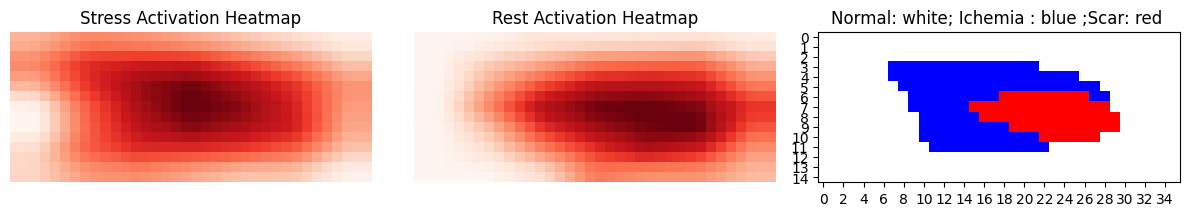

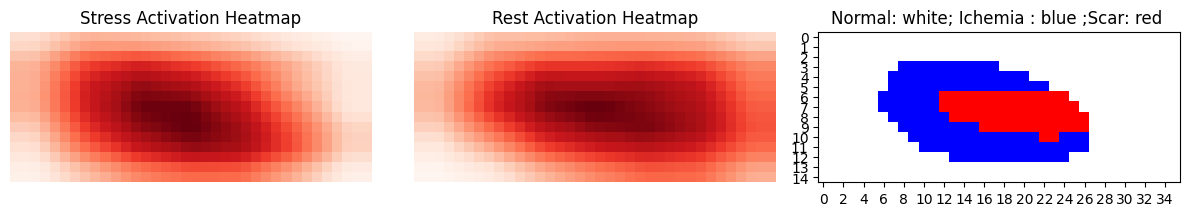

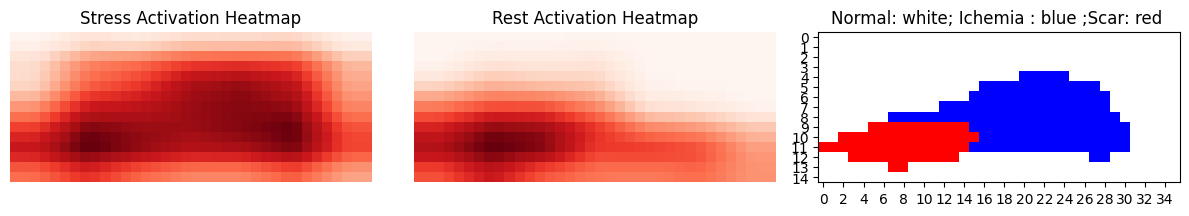

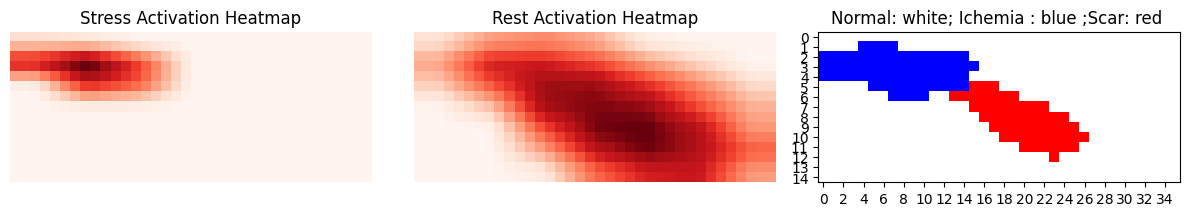

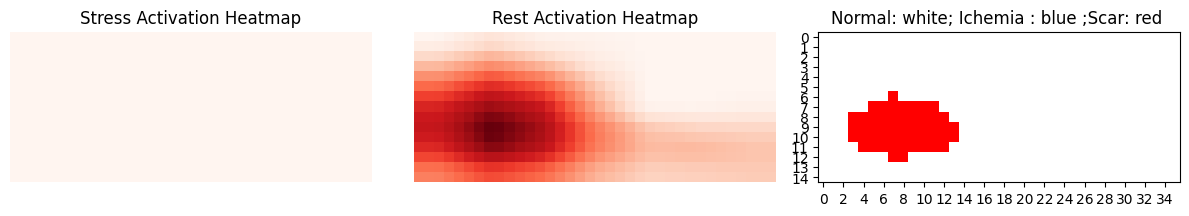

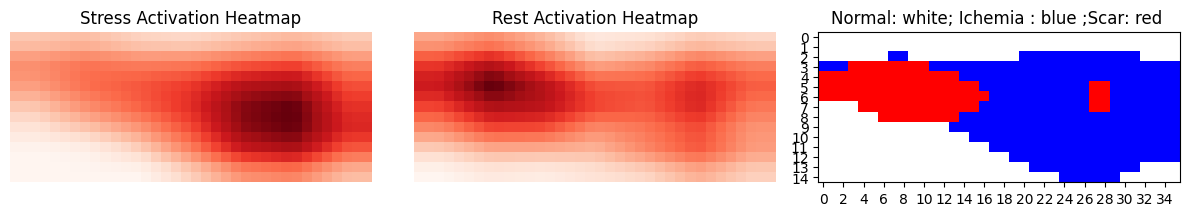

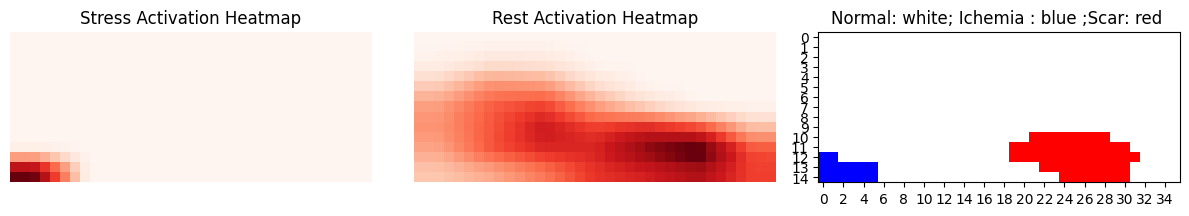

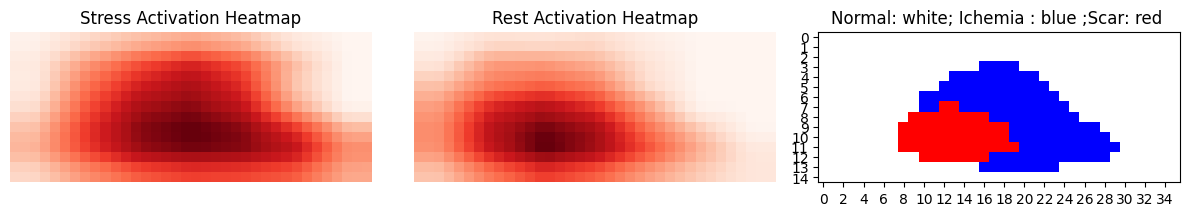

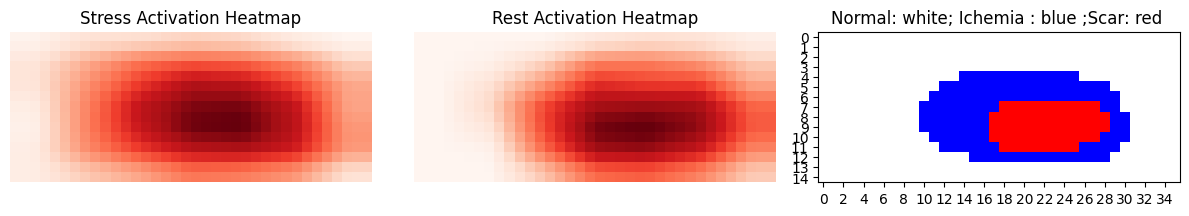

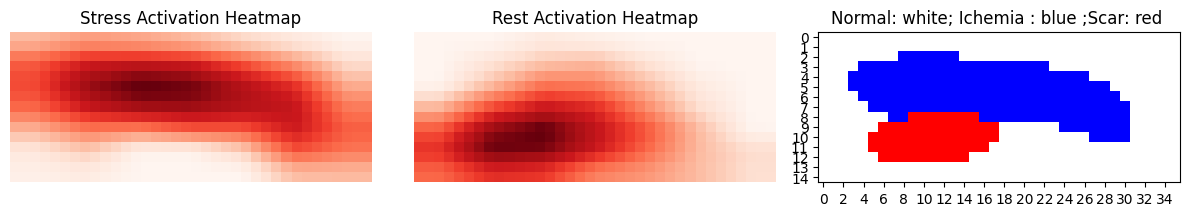

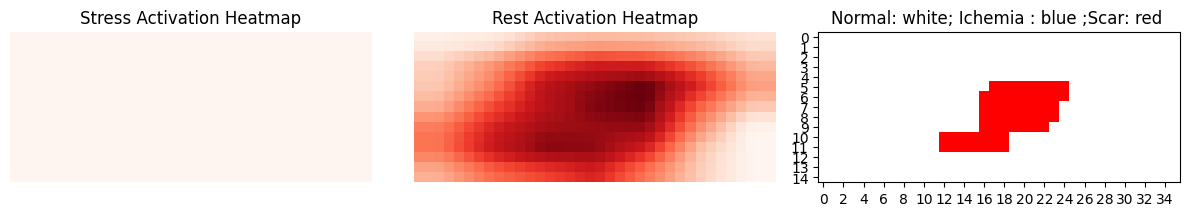

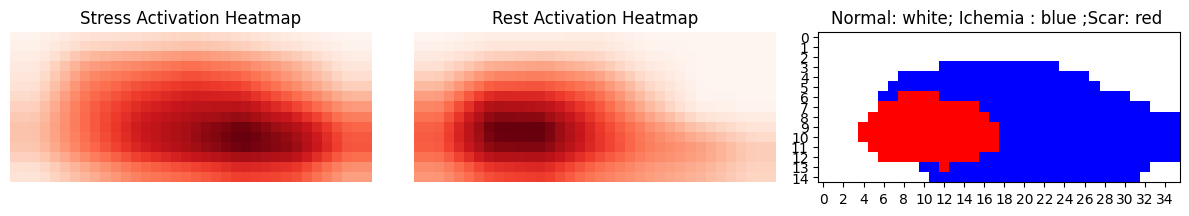

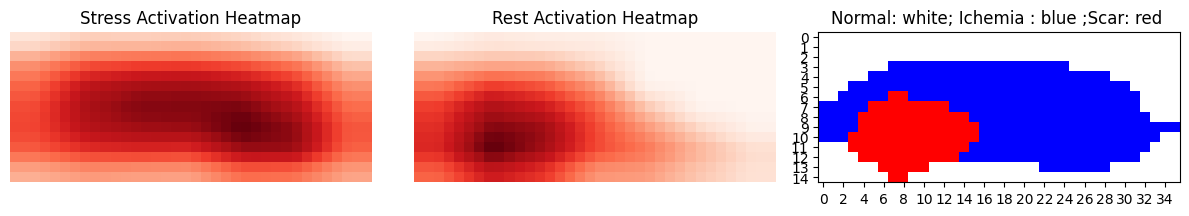

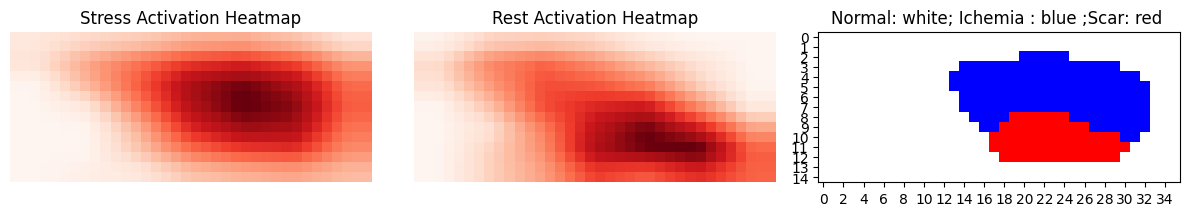

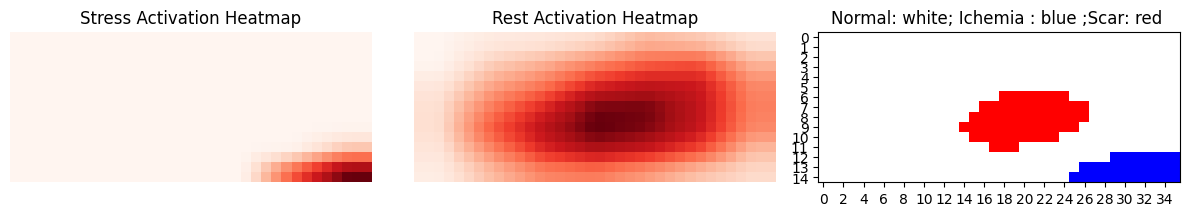

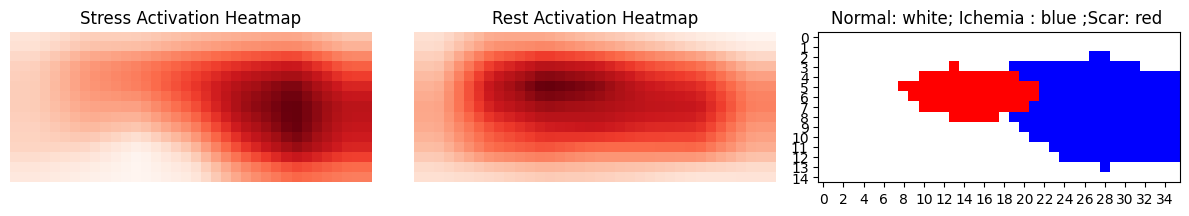

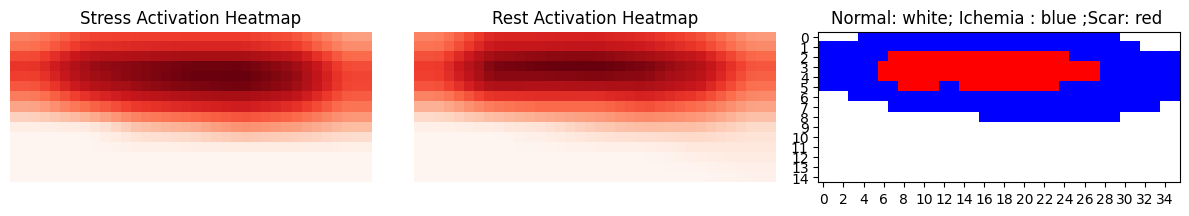

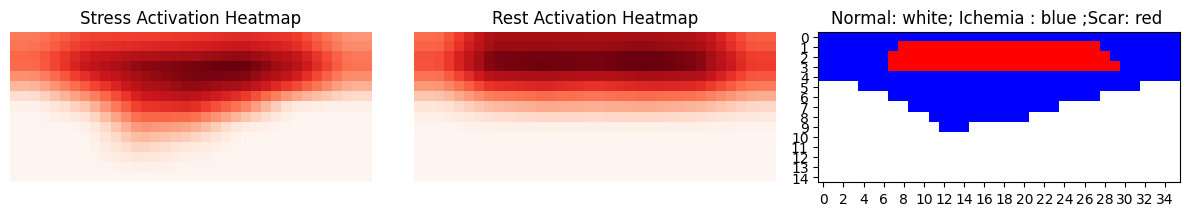

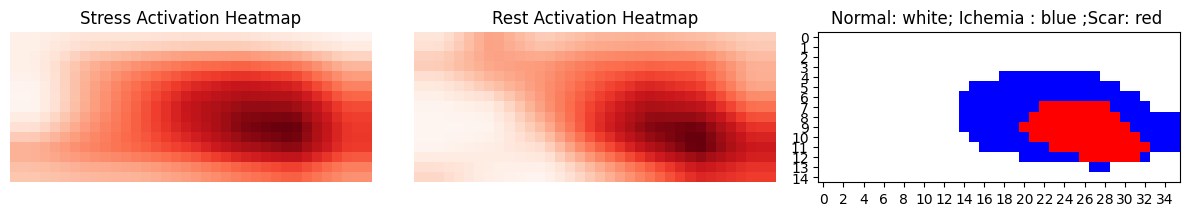

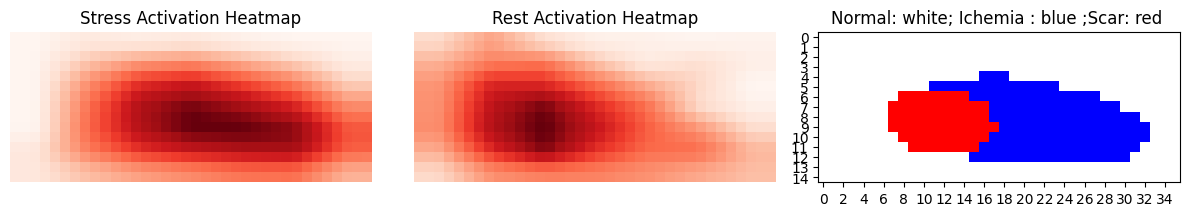

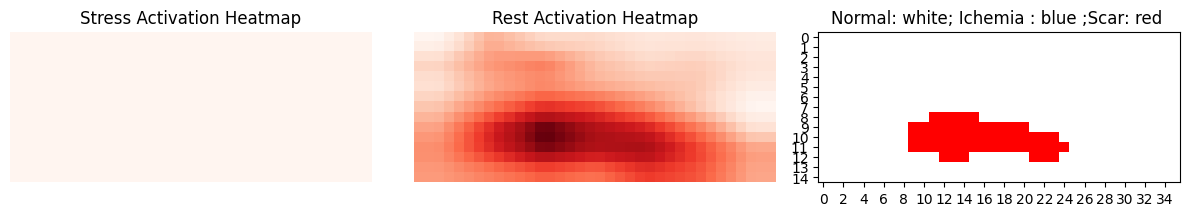

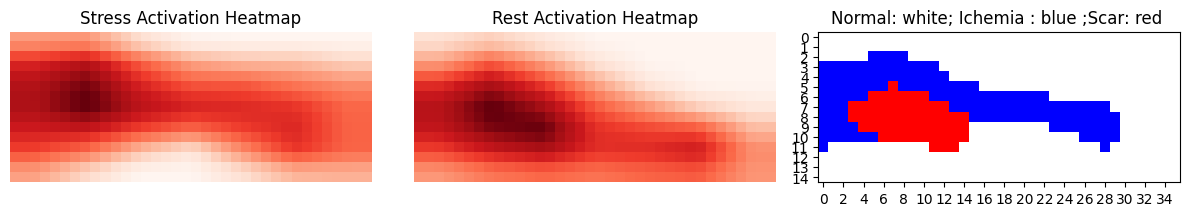

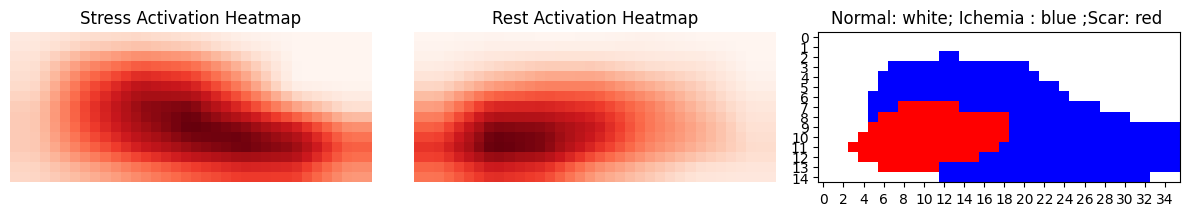

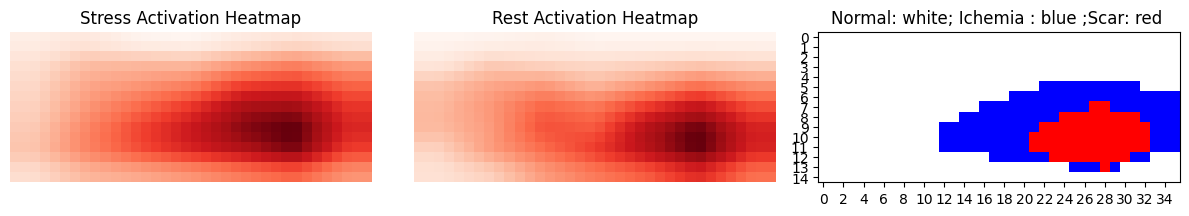

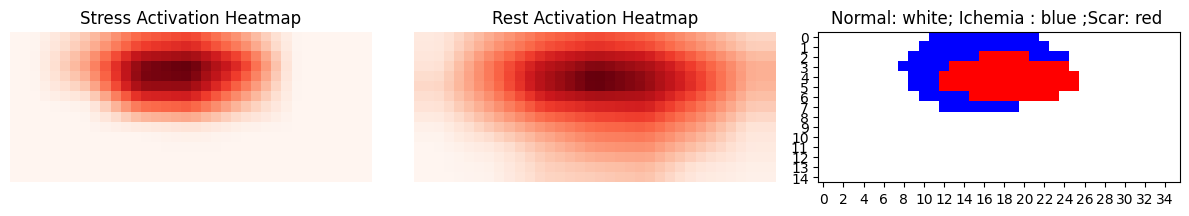

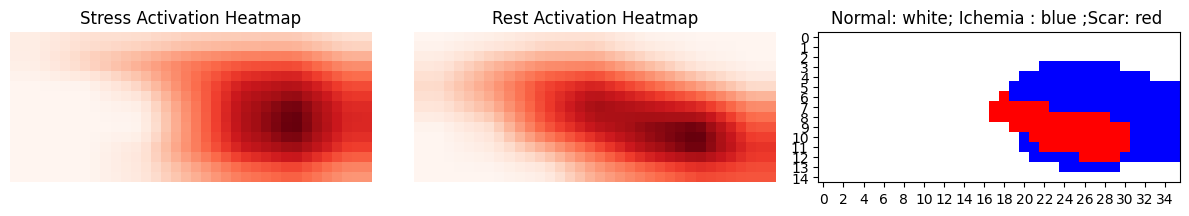

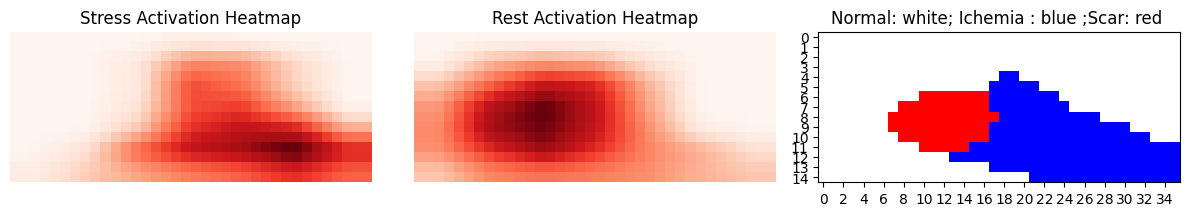

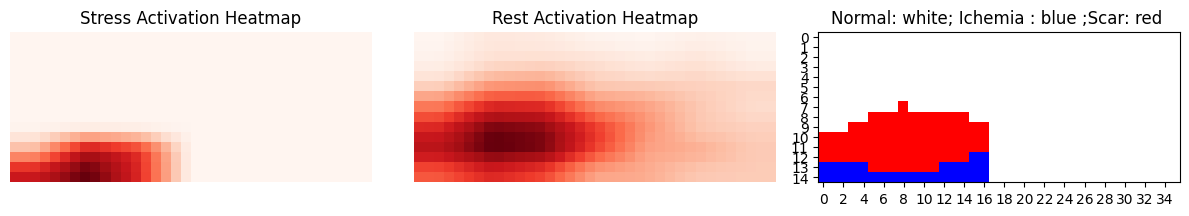

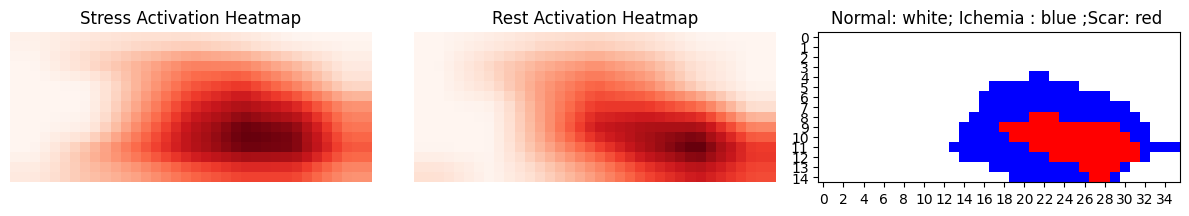

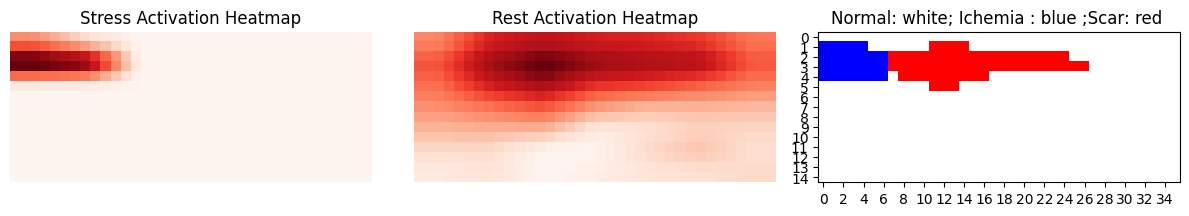

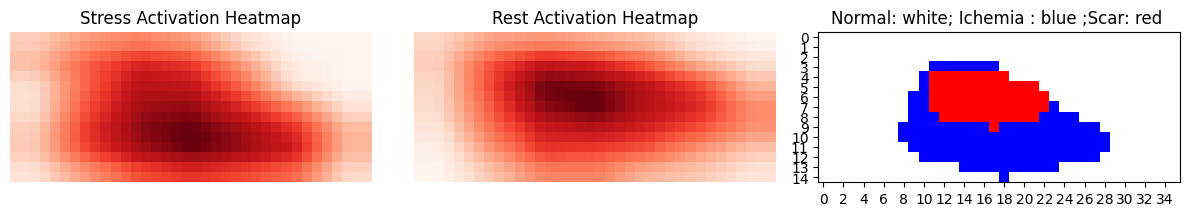

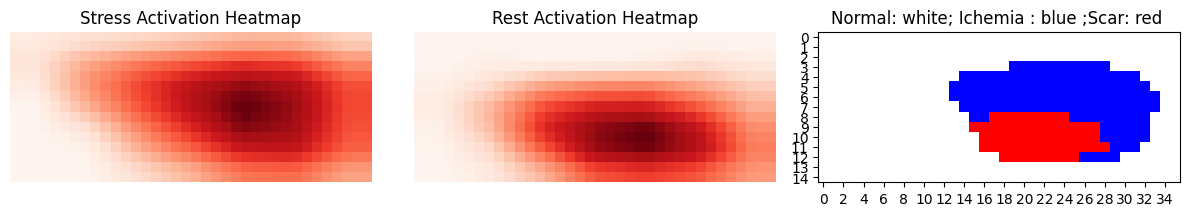

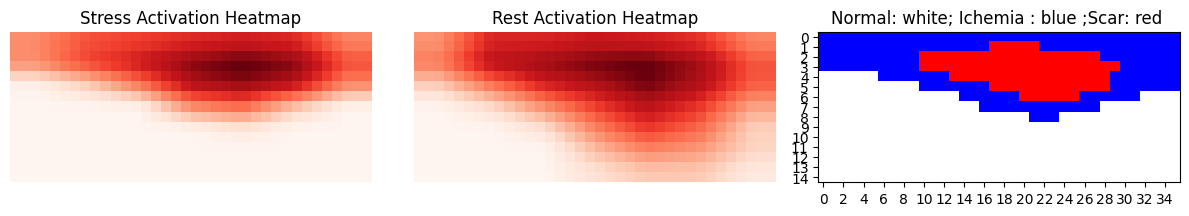

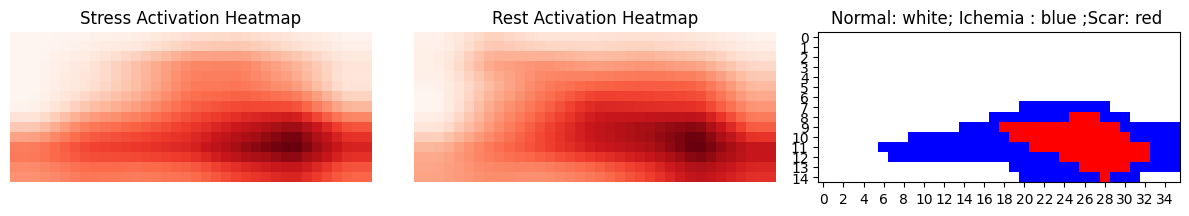

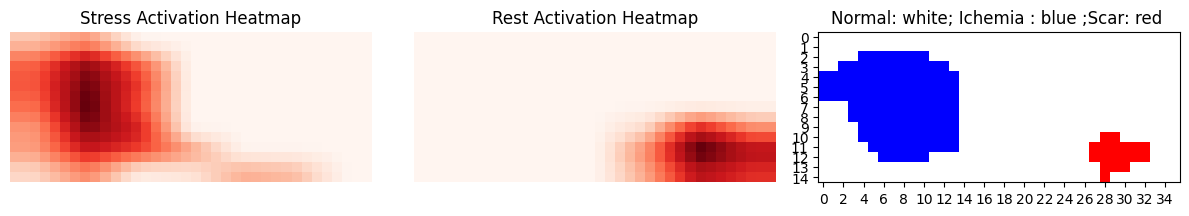

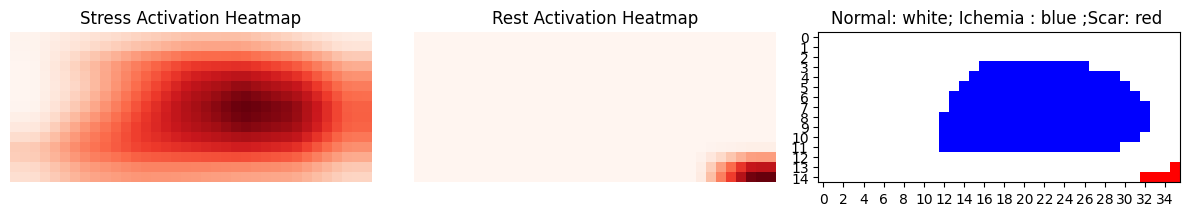

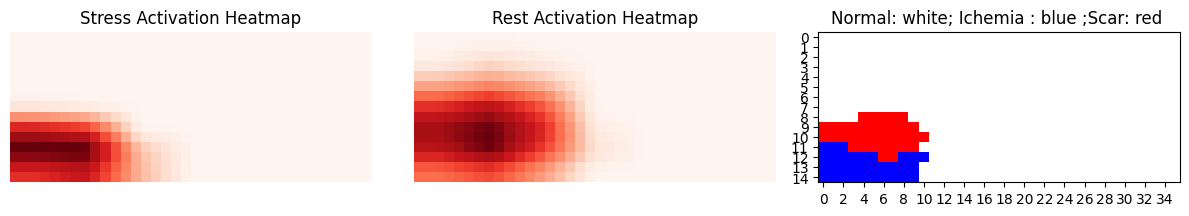

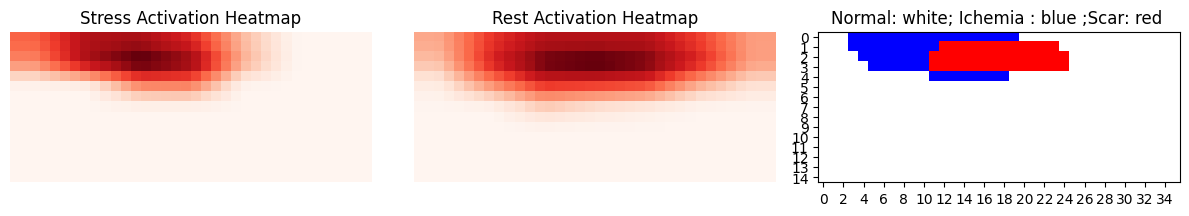

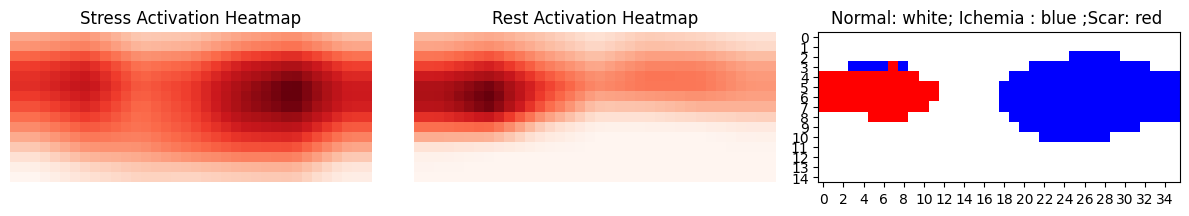

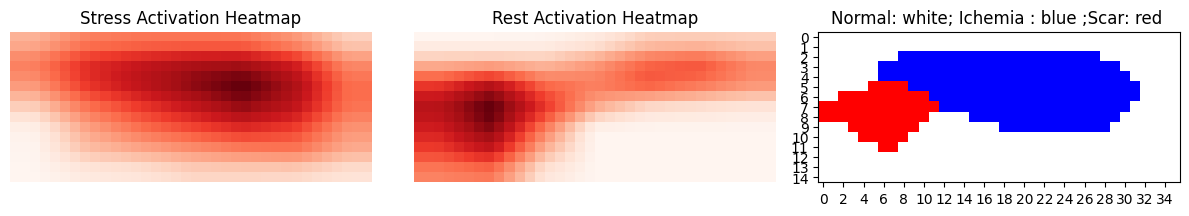

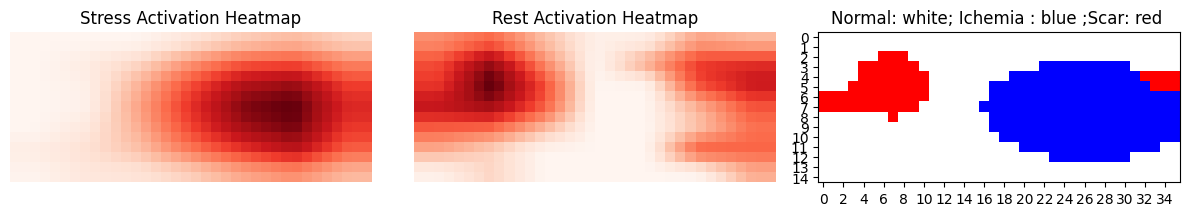

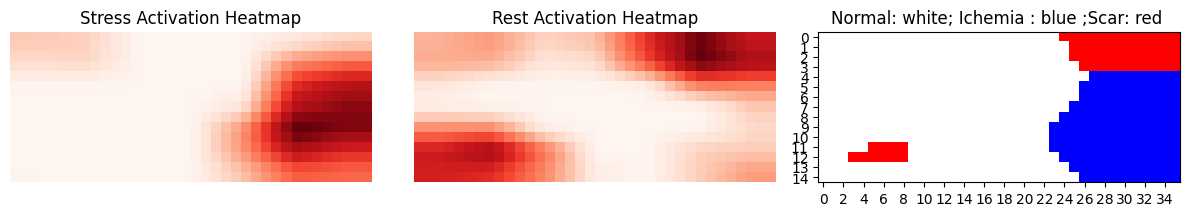

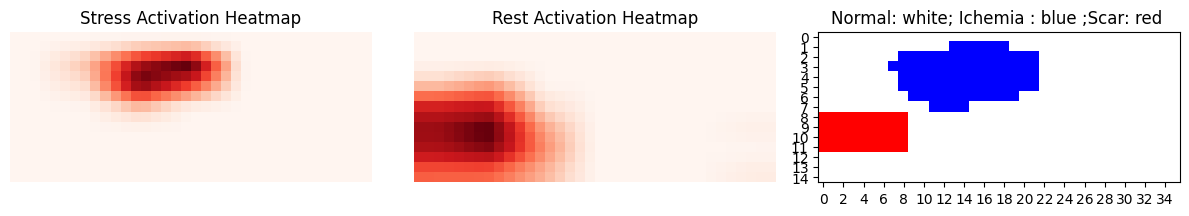

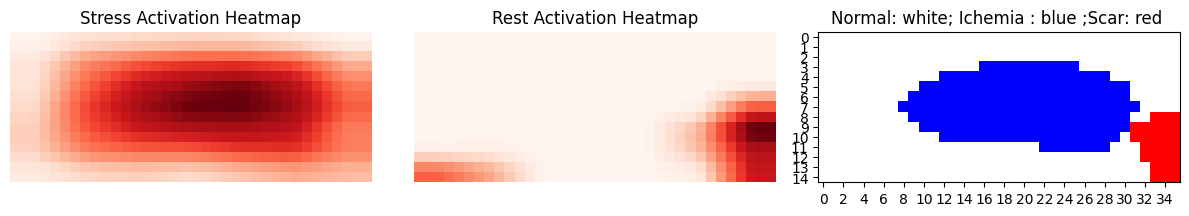

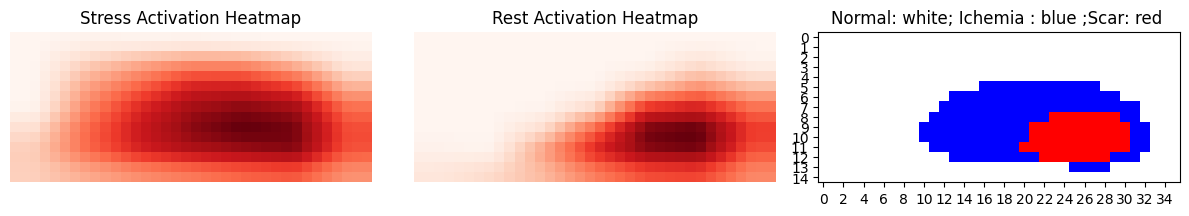

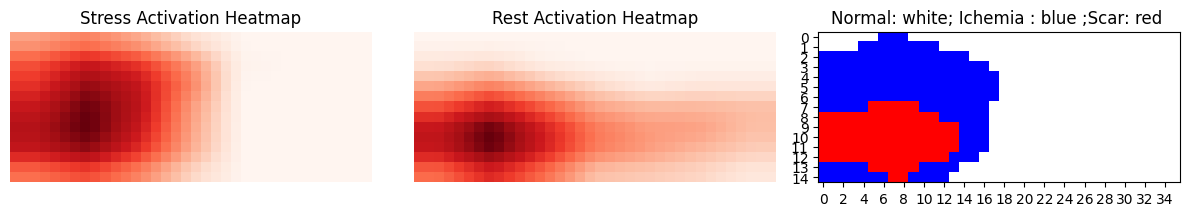

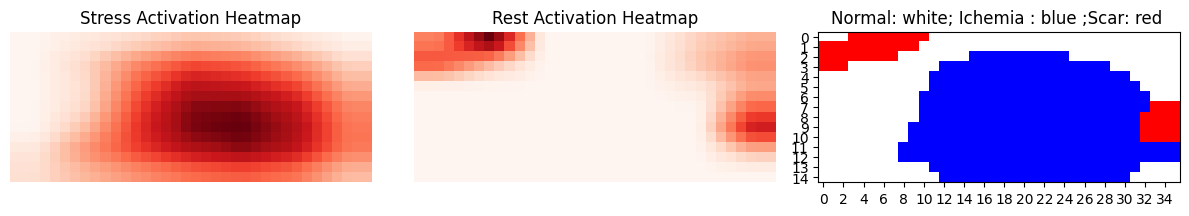

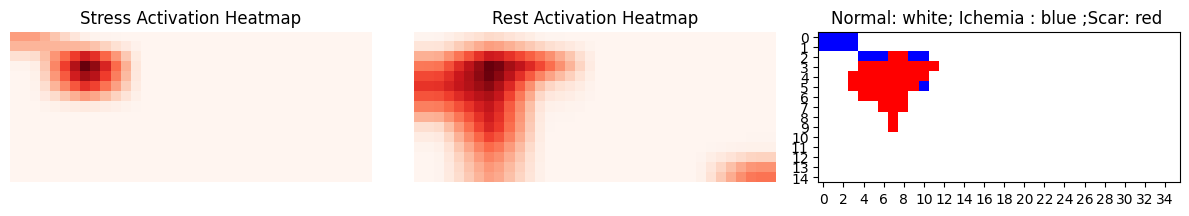

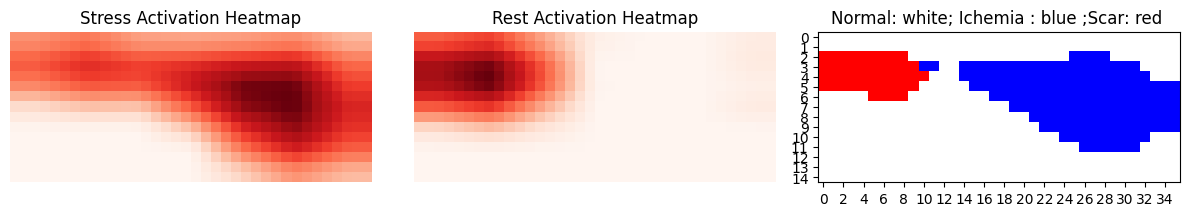

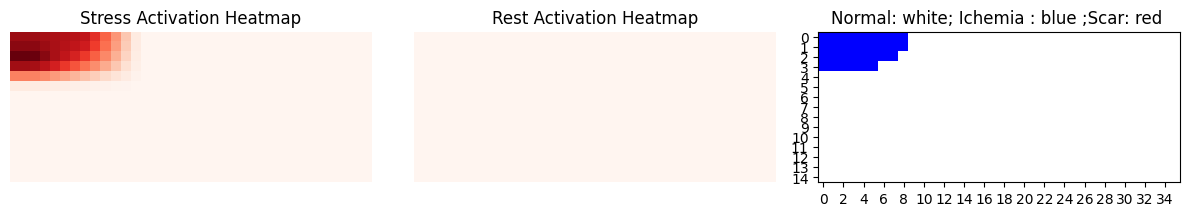

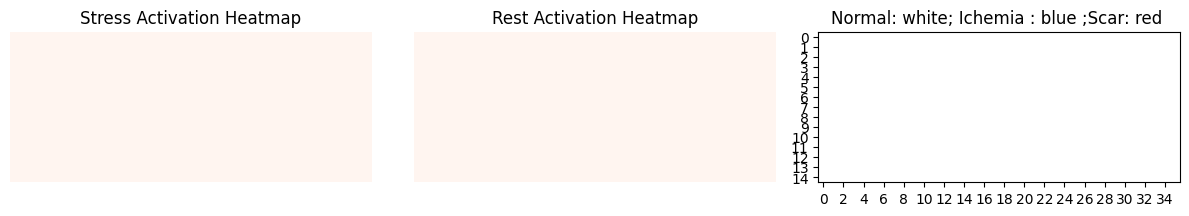

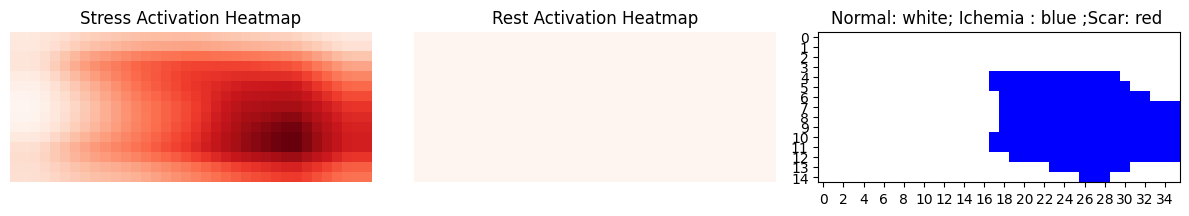

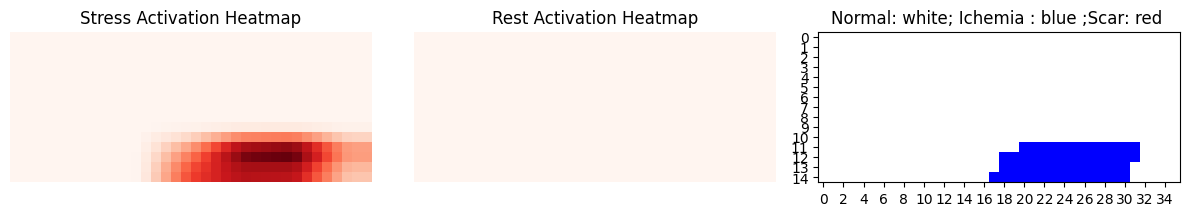

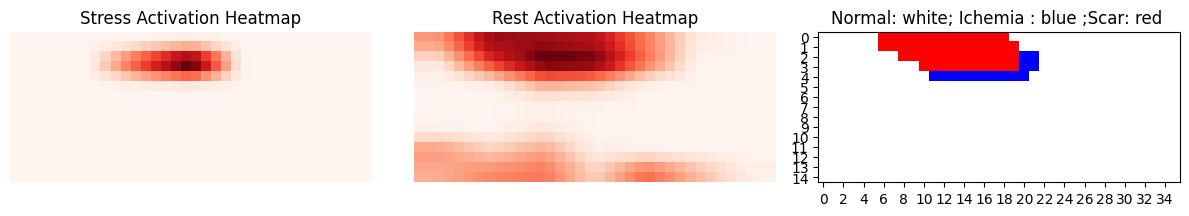

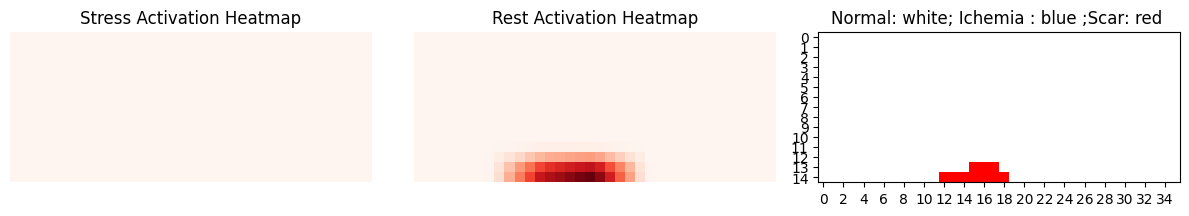

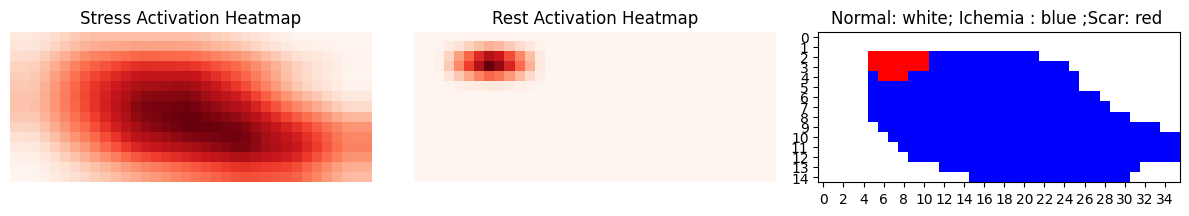

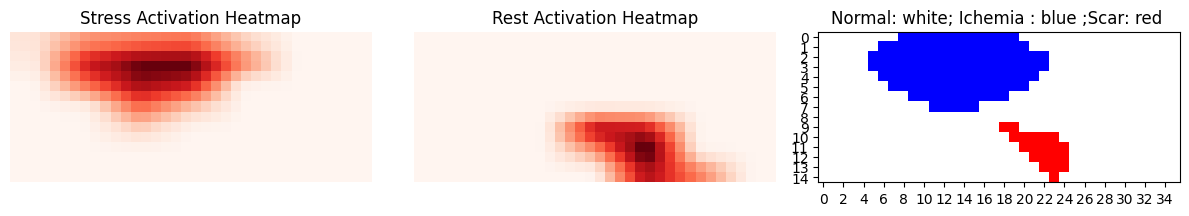

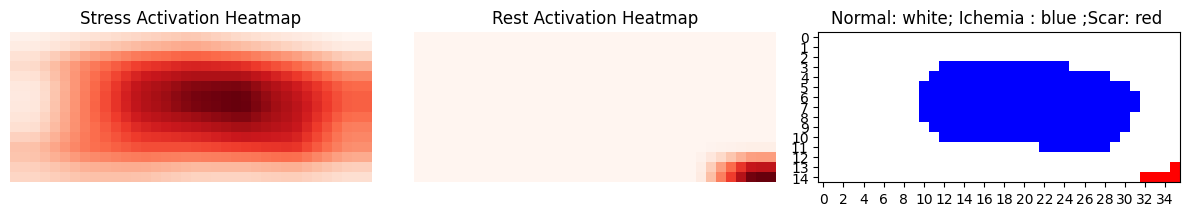

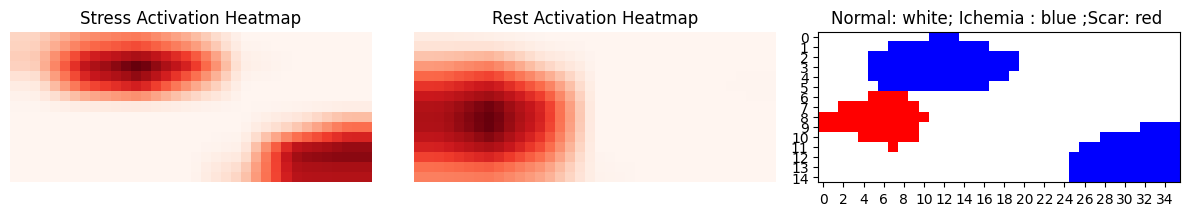

In [39]:
gradcam0=seg(0)

## old

In [6]:
%%capture
stress_input,rest_input,patient_pt=input_tensor()

abnormal_stress_0=[]
abnormal_rest_0=[]
ischemia_0=[]
scar_0=[]
for i in range(len(patient_pt)):
    stress_input_tensor=stress_input[i]
    rest_input_tensor=rest_input[i]
    rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=0)
    stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=0)
    stress_percent,rest_percent,ischemia_percent,scar_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient_pt[i].split('.')[0])
    abnormal_stress_0.append(stress_percent*100)
    abnormal_rest_0.append(scar_percent*100)
    ischemia_0.append(ischemia_percent*100)


In [7]:
gradcam=np.array([abnormal_stress_0,abnormal_rest_0,ischemia_0])
gradcam=gradcam.T
print(gradcam.shape)

(59, 3)


In [8]:
%%capture
stress_input,rest_input,patient_pt=input_tensor()

abnormal_stress_1=[]
abnormal_rest_1=[]
ischemia_1=[]
for i in range(len(patient_pt)):
    stress_input_tensor=stress_input[i]
    rest_input_tensor=rest_input[i]
    rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=1)
    stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=1)
    stress_percent,scar_percent,ischemia_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient_pt[i].split('.')[0])
    abnormal_stress_1.append(stress_percent*100)
    abnormal_rest_1.append(scar_percent*100)
    ischemia_1.append(ischemia_percent*100)

In [9]:
gradcamplus=np.array([abnormal_stress_1,abnormal_rest_1,ischemia_1])
gradcamplus=gradcamplus.T

In [10]:
%%capture
stress_input,rest_input,patient_pt=input_tensor()

abnormal_stress_2=[]
abnormal_rest_2=[]
ischemia_2=[]
for i in range(len(patient_pt)):
    stress_input_tensor=stress_input[i]
    rest_input_tensor=rest_input[i]
    rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=2)
    stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=2)
    stress_percent,scar_percent,ischemia_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient_pt[i].split('.')[0])
    abnormal_stress_2.append(stress_percent*100)
    abnormal_rest_2.append(scar_percent*100)
    ischemia_2.append(ischemia_percent*100)

In [11]:
ablationcam=np.array([abnormal_stress_2,abnormal_rest_2,ischemia_2])
ablationcam=ablationcam.T

In [12]:
%%capture
stress_input,rest_input,patient_pt=input_tensor()

abnormal_stress_3=[]
abnormal_rest_3=[]
ischemia_3=[]
for i in range(len(patient_pt)):
    stress_input_tensor=stress_input[i]
    rest_input_tensor=rest_input[i]
    rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=3)
    stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=3)
    stress_percent,scar_percent,ischemia_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient_pt[i].split('.')[0])
    abnormal_stress_3.append(stress_percent*100)
    abnormal_rest_3.append(scar_percent*100)
    ischemia_3.append(ischemia_percent*100)

In [13]:
HiResCAM=np.array([abnormal_stress_3,abnormal_rest_3,ischemia_3])
HiResCAM=HiResCAM.T

####  Conventional method
#### find the TPD value:

In [14]:
pat_bin,pat_txt=sort_txt_bin("DUMP")
TID=[]
SRD_STRESS_DIST_normal=[]
SRD_REST_DIST_normal=[]
SRD_STRESS_DIST_abnormal=[]
SRD_REST_DIST_abnormal=[]
normal=[]
ischemia=[]
scar=[]

for i in patient_pt:
    pat_name=i.split('.')[0]
    this_txt=findtxt(pat_name,pat_txt)
    txt_df=pd.read_csv(("DUMP//"+this_txt),sep=" :=",index_col=0,header=None)
    
    TID_INDEX=np.float32(txt_df.loc["TID_INDEX"])[0]
    stress_normal=np.float32(txt_df.loc["SRD_STRESS_DIST(03)"])[0]
    rest_normal=np.float32(txt_df.loc["SRD_REST_DIST(03)"])[0]
    
    normal_00=np.float32(txt_df.loc["SRD_ISCHEMIA_DIST(00)"])[0]
    ischemia_01=np.float32(txt_df.loc["SRD_ISCHEMIA_DIST(01)"])[0]
    scar_02=np.float32(txt_df.loc["SRD_ISCHEMIA_DIST(02)"])[0]
    
    TID.append(TID_INDEX)
    SRD_STRESS_DIST_normal.append(stress_normal)
    SRD_REST_DIST_normal.append(rest_normal)
    SRD_STRESS_DIST_abnormal.append(100-stress_normal)
    SRD_REST_DIST_abnormal.append(100-rest_normal)
    
    normal.append(normal_00)
    ischemia.append(ischemia_01)
    scar.append(scar_02)
    
    

In [15]:
convention=np.array([TID,SRD_STRESS_DIST_normal,SRD_REST_DIST_normal,SRD_STRESS_DIST_abnormal,SRD_REST_DIST_abnormal,normal,ischemia,scar])
convention=convention.T
print(convention.shape)

(59, 8)


## Concatenate  together

In [16]:
arr=np.concatenate((convention,gradcam,gradcamplus,ablationcam,HiResCAM),axis=1)
print(arr.shape)

(59, 20)


In [17]:
import pandas as pd 
df=pd.DataFrame(arr,index=patient_pt)
# print(df)


In [18]:
import pathlib
from pathlib import Path 
# csv_path=pathlib.Path().resolve()
# df.to_csv(csv_path)

df.to_excel("Extent.xlsx")

## debugging

In [6]:
stress_input,rest_input,patient_pt=input_tensor()
print(patient_pt)
# N181665328


['N152698773.pt', 'N153445767.pt', 'N153605004.pt', 'N153905848.pt', 'N181665328.pt', 'N181996551.pt', 'N182098033.pt', 'N182573977.pt', 'N182650517.pt', 'N182747858.pt', 'N182825523.pt', 'N182837157.pt', 'N182908964.pt', 'N183016575.pt', 'N183101692.pt', 'N183367293.pt', 'N183408689.pt', 'N183411831.pt', 'N183697394.pt', 'N184297874.pt', 'N184329353.pt', 'N184382649.pt', 'N184576644.pt', 'N184715289.pt', 'N184726702.pt', 'N184730856.pt', 'N184880778.pt', 'N184920484.pt', 'N185036069.pt', 'N185291819.pt', 'N185326362.pt', 'N185621051.pt', 'N186344730.pt', 'N186460998.pt', 'N152063293.pt', 'N152654657.pt', 'N153628207.pt', 'N153717102.pt', 'N182469418.pt', 'N182488761.pt', 'N182636179.pt', 'N183372672.pt', 'N183609173.pt', 'N183887085.pt', 'N183924138.pt', 'N184181113.pt', 'N184335140.pt', 'N184392758.pt', 'N184407038.pt', 'N184438083.pt', 'N184496853.pt', 'N184607161.pt', 'N184961671.pt', 'N184961971.pt', 'N185174091.pt', 'N185227889.pt', 'N185646735.pt', 'N185723341.pt', 'N186047663.p

In [29]:
stress_input_tensor=stress_input[6]
rest_input_tensor=rest_input[6]
patient=patient_pt[6].split('.')[0]
print(patient)

rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=1)
stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=1)

N182098033
tensor([[[[0.0000, 2.4485, 1.7403,  ..., 4.1654, 2.3458, 2.5414],
          [0.0000, 0.5321, 1.7878,  ..., 2.3568, 1.2466, 1.4538],
          [0.0000, 1.1119, 1.9920,  ..., 1.8982, 0.2073, 1.2393],
          ...,
          [0.0000, 0.0000, 1.8821,  ..., 0.0000, 0.0210, 0.0000],
          [0.0000, 0.0000, 2.3001,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 3.9873,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.5894,  ..., 0.0000, 0.4132, 0.3492],
          [0.0000, 0.8408, 0.0000,  ..., 0.0660, 2.1892, 0.8781],
          [0.0000, 0.0000, 1.9822,  ..., 3.6237, 2.8451, 1.9921],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.8673, 0.0000, 0.0000],
          [0.0000, 1.6831, 0.0000,  ..., 0.0000, 0.0000, 0.4068],
          [0.1703, 0.4395, 0.0000,  ..., 0.0000, 0.7442, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2414, 0.0000],
          [0.7910, 0.5549, 1.5602,  ..., 0.2958, 0.0000, 1.9916],
          [0.3423, 0.9184, 2.61

abnormal region of stress map is 36.1708% 
abnormal region of rest map  is 28.8077%  
region of ischemia is 7.6415%
region of scar is 22.8044%


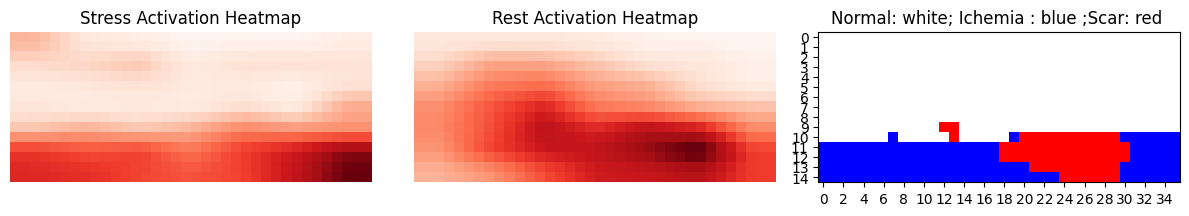

In [30]:
stress_percent,scar_percent,ischemia_percent,scar_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient)

In [1]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import BinaryClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from utils import MPIDataset,save_checkpoint, load_checkpoint,Evaluator
from models.Classifiers import Res18
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import skimage.transform
import os

In [7]:
from cam import *
import os

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
## For Stress 
model_stress = Res18()
stress_checkpoint_dir=Path(r"checkpoints/checkpoints_stress_Res18")/"model.ckpt-1600.pt"
stress_checkpoint=torch.load(stress_checkpoint_dir)
model_stress.load_state_dict(stress_checkpoint["model"])  
model_stress.to(device)
model_stress.eval()
stress_target_layers = [model_stress.model.layer4[-1]]


In [3]:
model_rest=Res18()
rest_checkpoint_dir=Path(r"checkpoints/checkpoints_rest_Res18")/"model.ckpt-100.pt"
rest_checkpoint=torch.load(rest_checkpoint_dir)
model_rest.load_state_dict(rest_checkpoint["model"])  
model_rest.to(device)
model_rest.eval()
rest_target_layers=[model_rest.model.layer4[-1]]

In [ ]:
def read_input(patient:str):
    stress=r"processed data/stress/stress "+patient+".pt"
    rest=r"processed data/rest/rest "+patient+".pt"
    stress_input_tensor=torch.from_numpy(torch.load(stress)["image"]).unsqueeze(0)
    rest_input_tensor=torch.from_numpy(torch.load(rest)["image"]).unsqueeze(0)
    return stress_input_tensor,rest_input_tensor

In [ ]:
def my_activate(patient:str,method=1):
    stress_input_tensor,rest_input_tensor=read_input(patient)
    stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=method)
    rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=method)
    stress_percent,scar_percent,ischemia_percent,scar_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,patient)

In [ ]:
from ReadBin import *

In [4]:
##N181749996
stress_input_tensor=torch.from_numpy(torch.load(r"processed data/stress/stress N181749996.pt")["image"]).unsqueeze(0)
rest_input_tensor=torch.from_numpy(torch.load(r"processed data/rest/rest N181749996.pt")["image"]).unsqueeze(0)

In [18]:
%%capture
stress_grayscale_cam=gray_scale(model_stress,stress_input_tensor,stress_target_layers,method=1)
rest_grayscale_cam=gray_scale(model_rest,rest_input_tensor,rest_target_layers,method=1)


abnormal region of stress map is 34.6186% 
abnormal region of rest map  is 30.1239%  
region of ischemia is 7.2581%
region of scar is 24.0604%


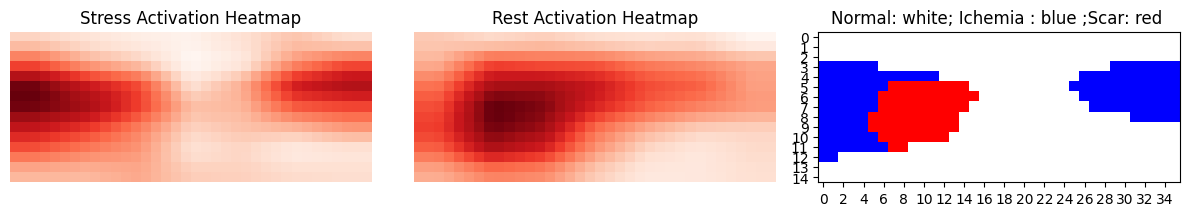

In [19]:
stress_percent,scar_percent,ischemia_percent,scar_percent=percentile_report(stress_grayscale_cam,rest_grayscale_cam,"N181749996")

In [25]:
from ReadImageBin import *
file_name=r"DUMP/N181749996.image.bin"
data=ImageBin._read_data(file_name)



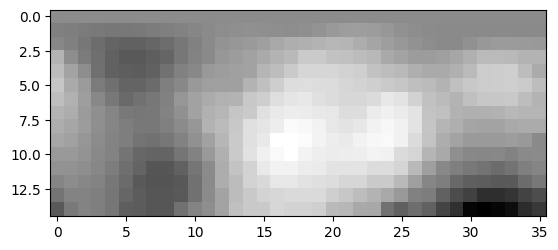

In [26]:
plt.figure()
plt.imshow(data["pm1"],cmap="gray")

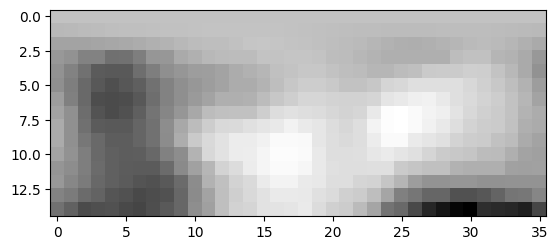

In [27]:
plt.figure()
plt.imshow(data["pm2"],cmap="gray")